# Lead Scoring Case Study

### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

The company wants to know:

- The leads that are most likely to convert into paying customers
- To build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance

### Step 1: Importing and Merging Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the useful libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt ,seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [3]:
# Importing the dataset
df = pd.read_csv("Leads.csv")
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

### Step 2: Inspecting the Dataframe

In [4]:
# Let's check the dimensions of the dataframe
df.shape

(9240, 37)

In [5]:
# let's look at the statistical aspects of the dataframe
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [6]:
# Let's see the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Step 3: Data Cleaning

#### Treating 'Select' Values
- As mentioned in the Problem statement, "Many of the categorical variables have a level called 'Select' which needs to be handled ". These are basically the columns in which customers have not selected any value from the list and hence this remains as default 'Select'. So we will be replacing them with Nan value

In [7]:
#Replacing " Select" with NaN
df=df.replace("Select",np.nan)

In [8]:
# Checking for missing/  null values
df.isnull().sum().sort_values(ascending=False)

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [9]:
# Get the percentage of missing values in all the columns
percent_missing=round(df.isnull().sum()/df.shape[0] * 100 ,2)
percent_missing

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
#As there are many missing values in the dataset. Getting all the columns with missing values >=40
percent_missing=percent_missing[percent_missing >=40]
percent_missing

How did you hear about X Education    78.46
Lead Quality                          51.59
Lead Profile                          74.19
Asymmetrique Activity Index           45.65
Asymmetrique Profile Index            45.65
Asymmetrique Activity Score           45.65
Asymmetrique Profile Score            45.65
dtype: float64

In [11]:
#dropping all the columns that has >=40 missing values
remove_cols_list=percent_missing.index.tolist()
remove_cols_list
df.drop(remove_cols_list,axis=1, inplace=True)
df.shape

(9240, 30)

In [12]:
#show the columns with missing value after dropping the columns with >=40 % missing values
round(df.isnull().sum()/df.shape[0] * 100 ,2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

In [13]:
# Checking the number of unique values in the column
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [14]:
# We notice that all the below columns have just one value in it. Let's check the value in all these columns
single_value_columns=['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',
                     'Get updates on DM Content','I agree to pay the amount through cheque']

for col in single_value_columns:
    print(col)
    print(df[col].unique(),"\n")


Magazine
['No'] 

Receive More Updates About Our Courses
['No'] 

Update me on Supply Chain Content
['No'] 

Get updates on DM Content
['No'] 

I agree to pay the amount through cheque
['No'] 



In [15]:
# The columns with just one value has only 'No' in it . so it is best we drop these columns as they won't help in our analysis

df.drop(single_value_columns,axis=1, inplace=True)
df.shape

(9240, 25)

In [16]:
# Check if there are any duplicates in the columns

df[df.duplicated(keep=False)]

Empty DataFrame
Columns: [Prospect ID, Lead Number, Lead Origin, Lead Source, Do Not Email, Do Not Call, Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Country, Specialization, What is your current occupation, What matters most to you in choosing a course, Search, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Tags, City, A free copy of Mastering The Interview, Last Notable Activity]
Index: []

- There are no duplicates 

In [17]:
cat_cols=df. dtypes[df. dtypes == 'object']
cat_colslist=cat_cols.index.tolist()
cat_colslist

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [18]:
for col in cat_colslist:
    print(col)
    print(df[col].value_counts())
    print('---------------------------')

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9240, dtype: int64
---------------------------
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
---------------------------
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55


##### There are few columns in which value " No" is majorly present and the value "Yes" has a negligable count  and hence it is best to drop these columns as it won't help us in the analysis.
The columns are: 
- Do Not Call
-Search
- Newspaper Article
- X Education Forums
- Newspaper
- Digital Advertisement
- Through Recommendations

##### Column "What matters most to you in choosing a course"  has majorly only "Better career Prospects " value in it. Hence it is better to drop this column as well as this won't help in analysis either





In [19]:
df.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
         'Through Recommendations','What matters most to you in choosing a course'],axis=1, inplace=True)
df.shape

(9240, 17)

In [20]:
# Checking the null values again
df.isnull().sum().sort_values(ascending=False)

City                                      3669
Specialization                            3380
Tags                                      3353
What is your current occupation           2690
Country                                   2461
Page Views Per Visit                       137
TotalVisits                                137
Last Activity                              103
Lead Source                                 36
A free copy of Mastering The Interview       0
Prospect ID                                  0
Lead Number                                  0
Total Time Spent on Website                  0
Converted                                    0
Do Not Email                                 0
Lead Origin                                  0
Last Notable Activity                        0
dtype: int64

In [21]:
percent_missing=round(df.isnull().sum()/df.shape[0] * 100 ,2).sort_values(ascending=False)
percent_missing

City                                      39.71
Specialization                            36.58
Tags                                      36.29
What is your current occupation           29.11
Country                                   26.63
Page Views Per Visit                       1.48
TotalVisits                                1.48
Last Activity                              1.11
Lead Source                                0.39
A free copy of Mastering The Interview     0.00
Prospect ID                                0.00
Lead Number                                0.00
Total Time Spent on Website                0.00
Converted                                  0.00
Do Not Email                               0.00
Lead Origin                                0.00
Last Notable Activity                      0.00
dtype: float64


- City column has  missing values close to 40 %. So we will drop this column
- Column Specialization cannot be removed as this seems like an important column. So, we will be replacing the null values in this column with "Unknown"
- Tags have very high percentage of missing values- 36.29 %. Tags  are assigned to customers indicating the current status of the lead.This could be removed
- "What is your current occupation" column has 29.11% of missing values. So, we will be replacing these values with "Unknown"  
- Country has 26.63 percentage missing values and most of the values in this column is " India" so it doesn't make sense to impute missing values. Instead this column can be removed as this doesn't add much value to analysis.
- "Last Activity" has 1.11 % missing values and "Email Opened" has the highest value. So, this can be imputed with "Email Opened"
- "Lead Source" has 0.39% missing values and "Google" has the highest value. So, this can be imputed with "Google"
and this column has "google" which appears 5 times. So, we can replace "google" with Google to standardize the values



In [22]:
# Dropping columns 'City', 'Tags' and 'Country'

df.drop(['City','Tags','Country'],axis=1, inplace=True)
df.shape

(9240, 14)

In [23]:
# Replacing the null values in 'Specialization' column with "Unknown"
df['Specialization']= df['Specialization'].replace(np.nan,'Unknown')

In [24]:
# Replacing the null values in 'What is your current occupation' column with "Unknown"
df['What is your current occupation']= df['What is your current occupation'].replace(np.nan,'Unknown')

In [25]:
# Replacing the null values in 'Last Activity' column with "Email Opened"
df['Last Activity']= df['Last Activity'].replace(np.nan,'Email Opened')

In [26]:
# Replacing the null values in 'Lead Source' column with "Google" and Replacing value "google" with "Google" to standardize the values
df['Lead Source']= df['Lead Source'].replace(np.nan,'Google')
df['Lead Source']= df['Lead Source']. replace('google','Google')
 

##### Handling missing values in numerical columns 
 


- Page Views Per Visit' and and 'TotalVisits' have 1.48% missing values


In [27]:
# checking the skew value of the columns to identify if the missing values can be imputed with Mean , Median or Mode

df['Page Views Per Visit'].skew()

2.871792896566408

In [28]:
df['TotalVisits'].skew()

19.911657340056212

-  A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.
-  If it is highly skewed imputing with median. Imputing with Mode or Mean if is is moderately skewed or fairly symmetrical.
-  In our case, all the above are highly skewed, so we fill in all the null values with the median .

In [29]:
# Replacing the null values in 'Page Views Per Visit'  with median() values as it is highly skewed

df['Page Views Per Visit']= df['Page Views Per Visit'] .replace(np.nan,df['Page Views Per Visit'].median())

In [30]:
# Replacing the null values in  'TotalVisits' with median() value as it is highly skewed

df['TotalVisits']= df['TotalVisits'] .replace(np.nan,df['TotalVisits'].median())

In [31]:
# Checking the null values again
df.isnull().sum().sort_values(ascending=False)

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64


- There are no more missing values in the dataset

In [32]:
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email  Converted  TotalVisits  \
0      Olark Chat           No          0          0.0   
1  Organic Search           No          0          5.0   
2  Direct Traffic           No          1          2.0   
3  Direct Traffic           No          0          1.0   
4          Google           No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0                  Unknown                      Unemployed   
1                  Unknown                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4                  Unknown                      Unemployed   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

##### Dropping the columns that do not add any value to our model

Removing below columns that are not important for data analysis 

- Prospect ID
- Lead Number
- Last Notable Activity

In [33]:
df.drop(['Prospect ID','Lead Number','Last Notable Activity'],axis=1, inplace=True)
df.shape

(9240, 11)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

### Handling Outliers

In [35]:
df.describe()

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000                  9240.000000   
mean      0.385390     3.438636                   487.698268   
std       0.486714     4.819024                   548.021466   
min       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.357440  
std                2.145781  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
max               55.000000

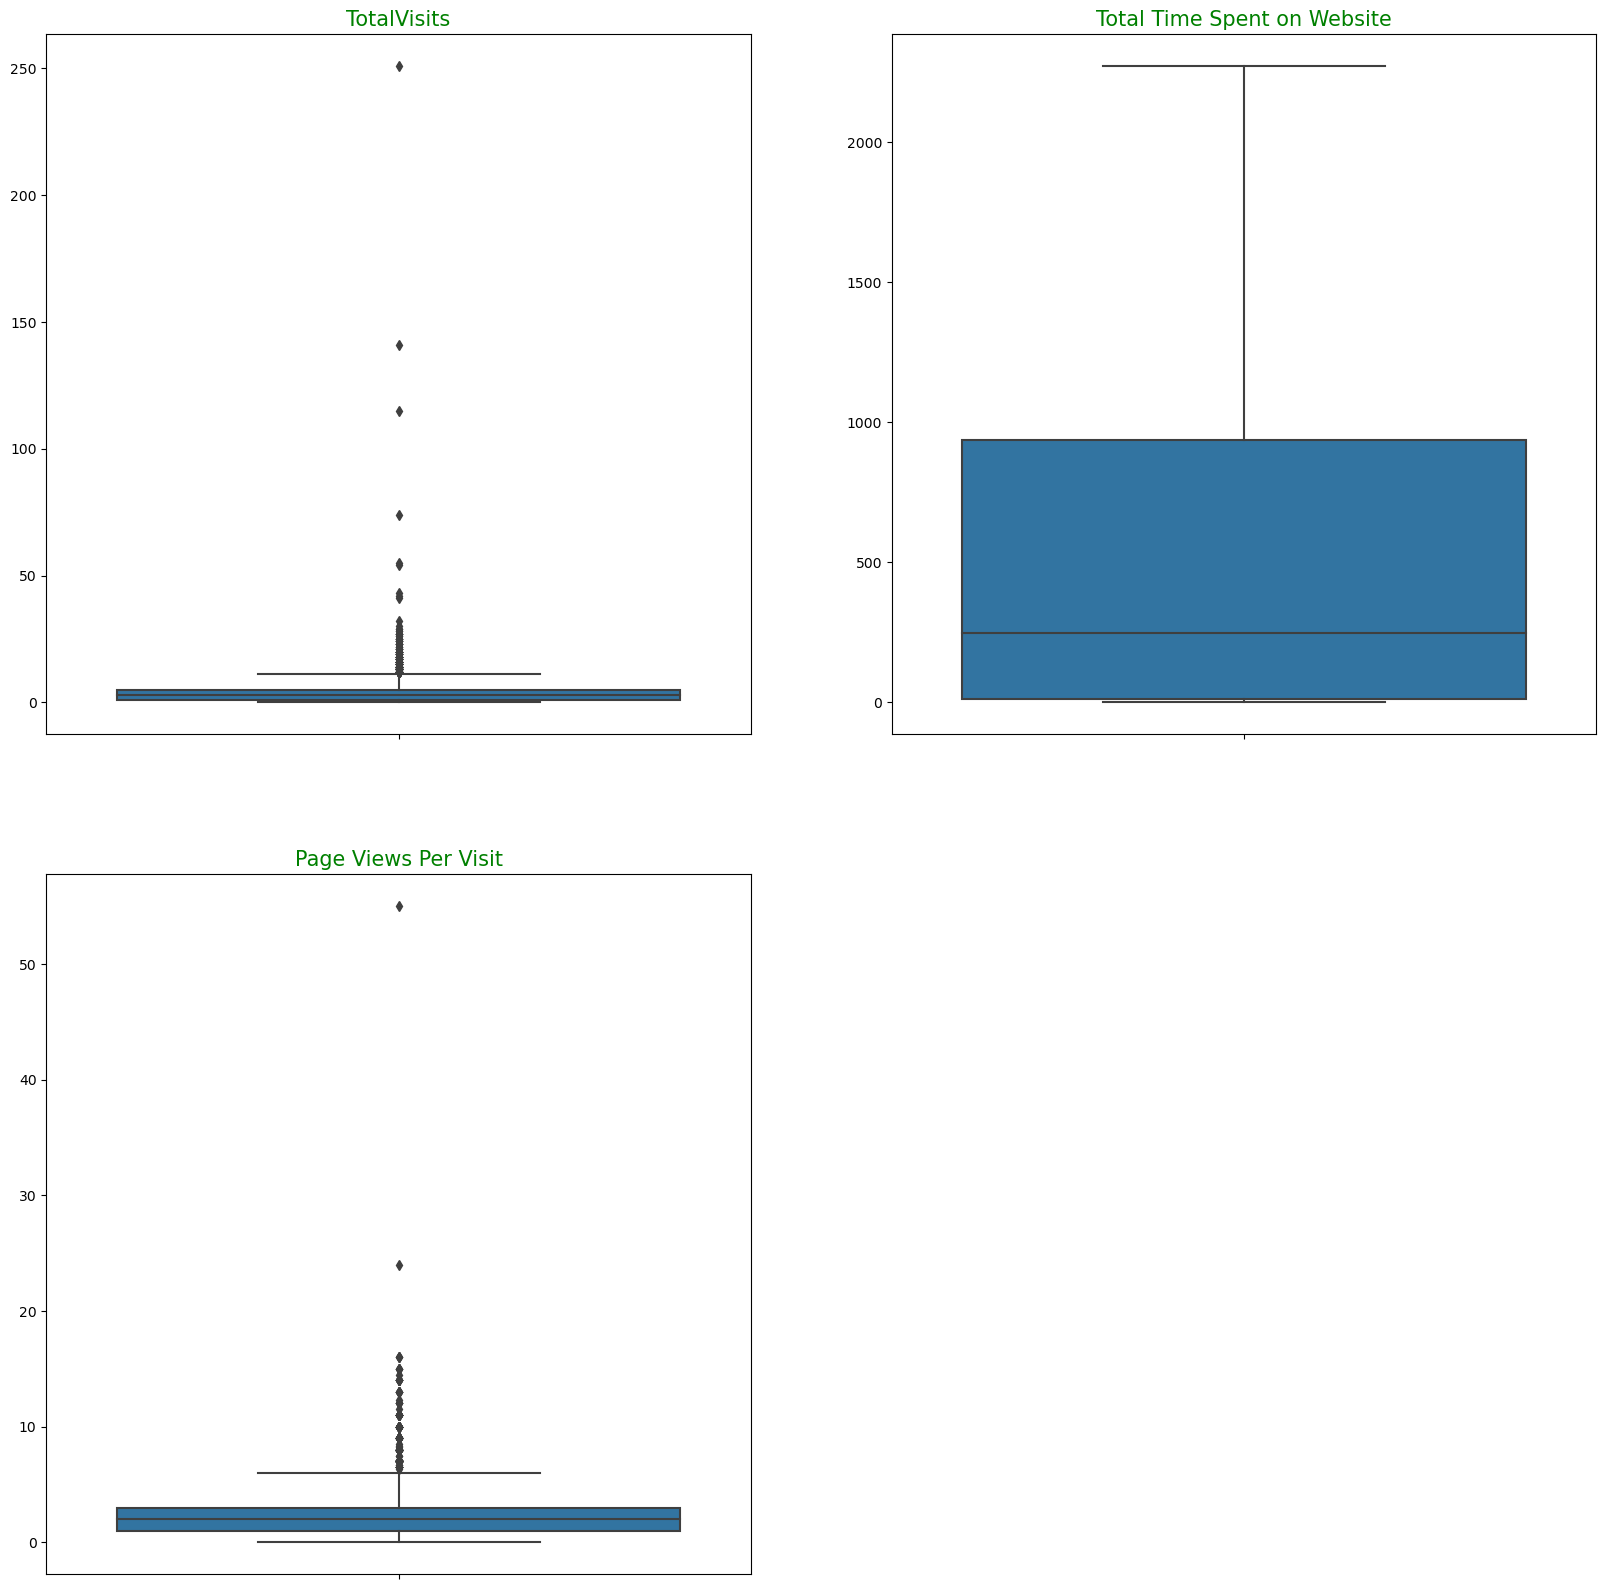

In [36]:
# Plotting boxplot to check for outliers
num_cols=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

plt.figure(figsize=(20, 20))
for i,j in enumerate(num_cols):
    plt.subplot(2,2,i+1)
    sns.boxplot(y=df[j])
    plt.ylabel(None)
    plt.title(j,fontsize=15,color='green')
plt.show()

- Columns 'Total Visits' and 'Page View Per Visit' seem to have outliers

In [37]:
#Checking outliers at different percentiles 
df.describe(percentiles=[0.5,0.7,0.9,0.95,0.99])

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000                  9240.000000   
mean      0.385390     3.438636                   487.698268   
std       0.486714     4.819024                   548.021466   
min       0.000000     0.000000                     0.000000   
50%       0.000000     3.000000                   248.000000   
70%       1.000000     4.000000                   715.000000   
90%       1.000000     7.000000                  1380.000000   
95%       1.000000    10.000000                  1562.000000   
99%       1.000000    17.000000                  1840.610000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.357440  
std                2.145781  
min                0.000000  
50%                2.000000  
70%                3.000000  
90%                5.000000  
95%                6.000000  
99%                9.000000  
max               55.000000

- We have outliers in 'TotalVisits' and 'Page Views Per Visit' column and  it needs to be handled

In [38]:
# Treatment of outliers for 'TotalVisits' column

quantile_value=df['TotalVisits'].quantile(0.99)
df=df[df['TotalVisits'] < quantile_value]
df['TotalVisits'].describe(percentiles=[0.5,0.7,0.9,0.95,0.99])

count    9141.000000
mean        3.179740
std         2.913631
min         0.000000
50%         3.000000
70%         4.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [39]:
# Treatment of outliers for 'Page Views Per Visit' column

quantile_value=df['Page Views Per Visit'].quantile(0.99)
df=df[df['Page Views Per Visit'] < quantile_value]
df['Page Views Per Visit'].describe(percentiles=[0.5,0.7,0.9,0.95,0.99])

count    9029.000000
mean        2.226383
std         1.823395
min         0.000000
50%         2.000000
70%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

In [40]:
#Checking outliers again at different percentiles 
df.describe(percentiles=[0.5,0.7,0.9,0.95,0.99])

Converted  TotalVisits  Total Time Spent on Website  \
count  9029.000000  9029.000000                  9029.000000   
mean      0.385092     3.087164                   483.133016   
std       0.486644     2.801244                   547.420675   
min       0.000000     0.000000                     0.000000   
50%       0.000000     3.000000                   245.000000   
70%       1.000000     4.000000                   694.000000   
90%       1.000000     7.000000                  1378.000000   
95%       1.000000     8.000000                  1558.000000   
99%       1.000000    13.000000                  1839.720000   
max       1.000000    16.000000                  2272.000000   

       Page Views Per Visit  
count           9029.000000  
mean               2.226383  
std                1.823395  
min                0.000000  
50%                2.000000  
70%                3.000000  
90%                5.000000  
95%                6.000000  
99%                7.000000  
max                8.000000

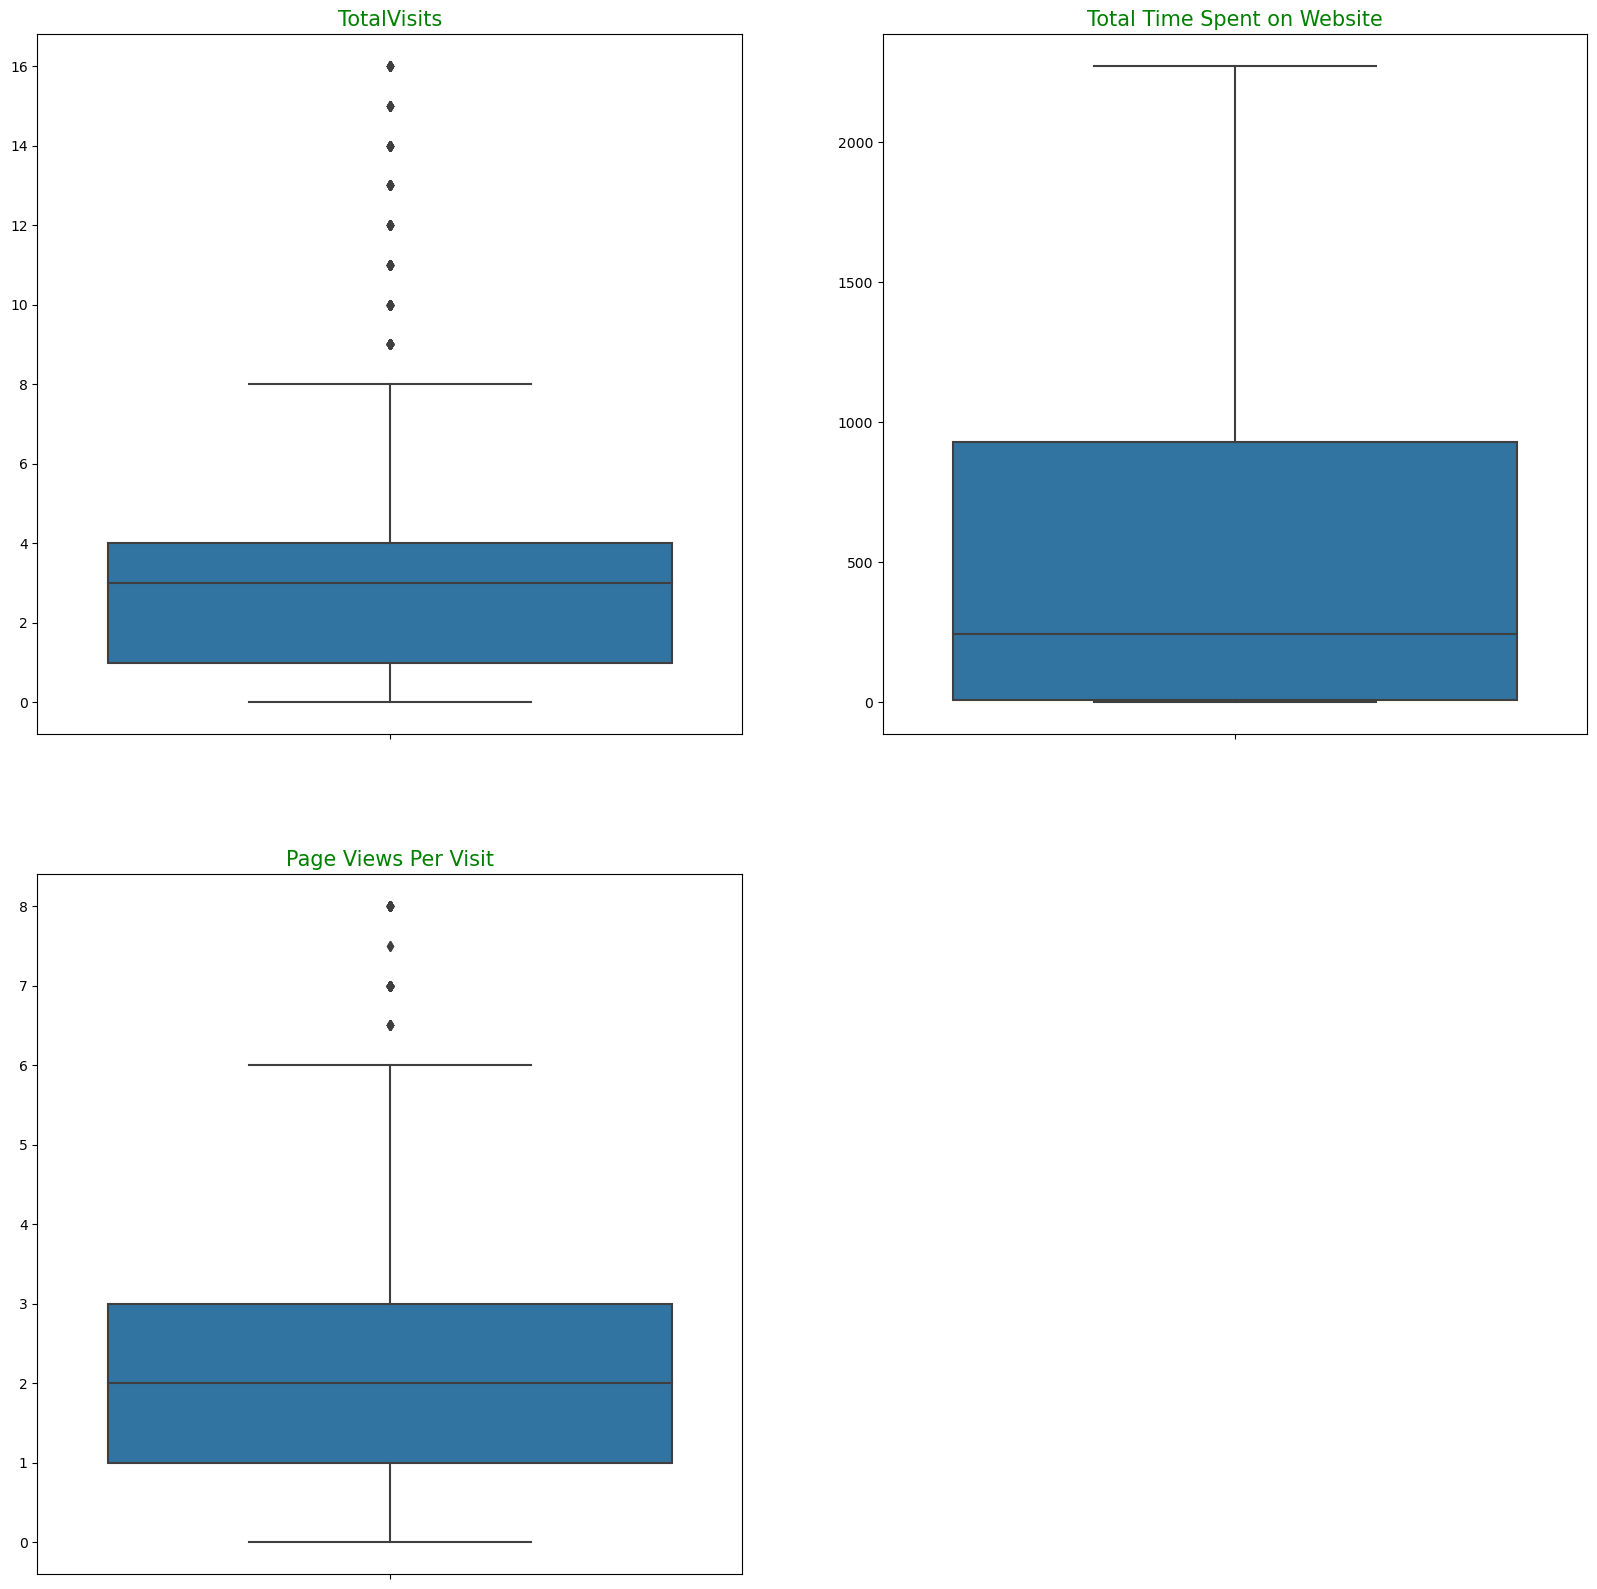

In [41]:
# Plotting boxplot to check for outliers again
num_cols=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

plt.figure(figsize=(20, 20))
for i,j in enumerate(num_cols):
    plt.subplot(2,2,i+1)
    sns.boxplot(y=df[j])
    plt.ylabel(None)
    plt.title(j,fontsize=15,color='green')
plt.show()

### Step 4: EDA



#### Data Imbalance

In [42]:
# Checking for Data Imbalance on Target variable "Converted"

df["Converted"].value_counts(normalize=True)*100

0    61.490752
1    38.509248
Name: Converted, dtype: float64

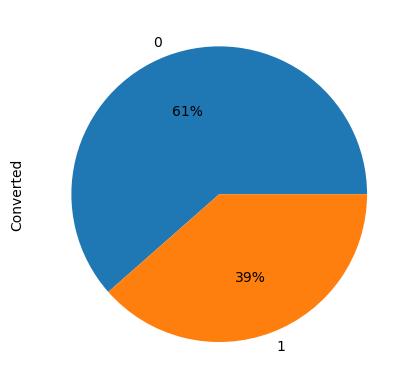

In [43]:
df["Converted"].value_counts(normalize=True).plot.pie(autopct="%1.0f%%");

- 39% of people are converted to leads
- 61%  of people did not convert to leads

### Univariate Analysis

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9029 non-null   object 
 1   Lead Source                             9029 non-null   object 
 2   Do Not Email                            9029 non-null   object 
 3   Converted                               9029 non-null   int64  
 4   TotalVisits                             9029 non-null   float64
 5   Total Time Spent on Website             9029 non-null   int64  
 6   Page Views Per Visit                    9029 non-null   float64
 7   Last Activity                           9029 non-null   object 
 8   Specialization                          9029 non-null   object 
 9   What is your current occupation         9029 non-null   object 
 10  A free copy of Mastering The Interview  9029 non-null   obje

In [45]:
# To get the list of Categorical columns
cat_cols=df. dtypes[df. dtypes == 'object']
cat_colslist=cat_cols.index.tolist()
cat_colslist

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'A free copy of Mastering The Interview']

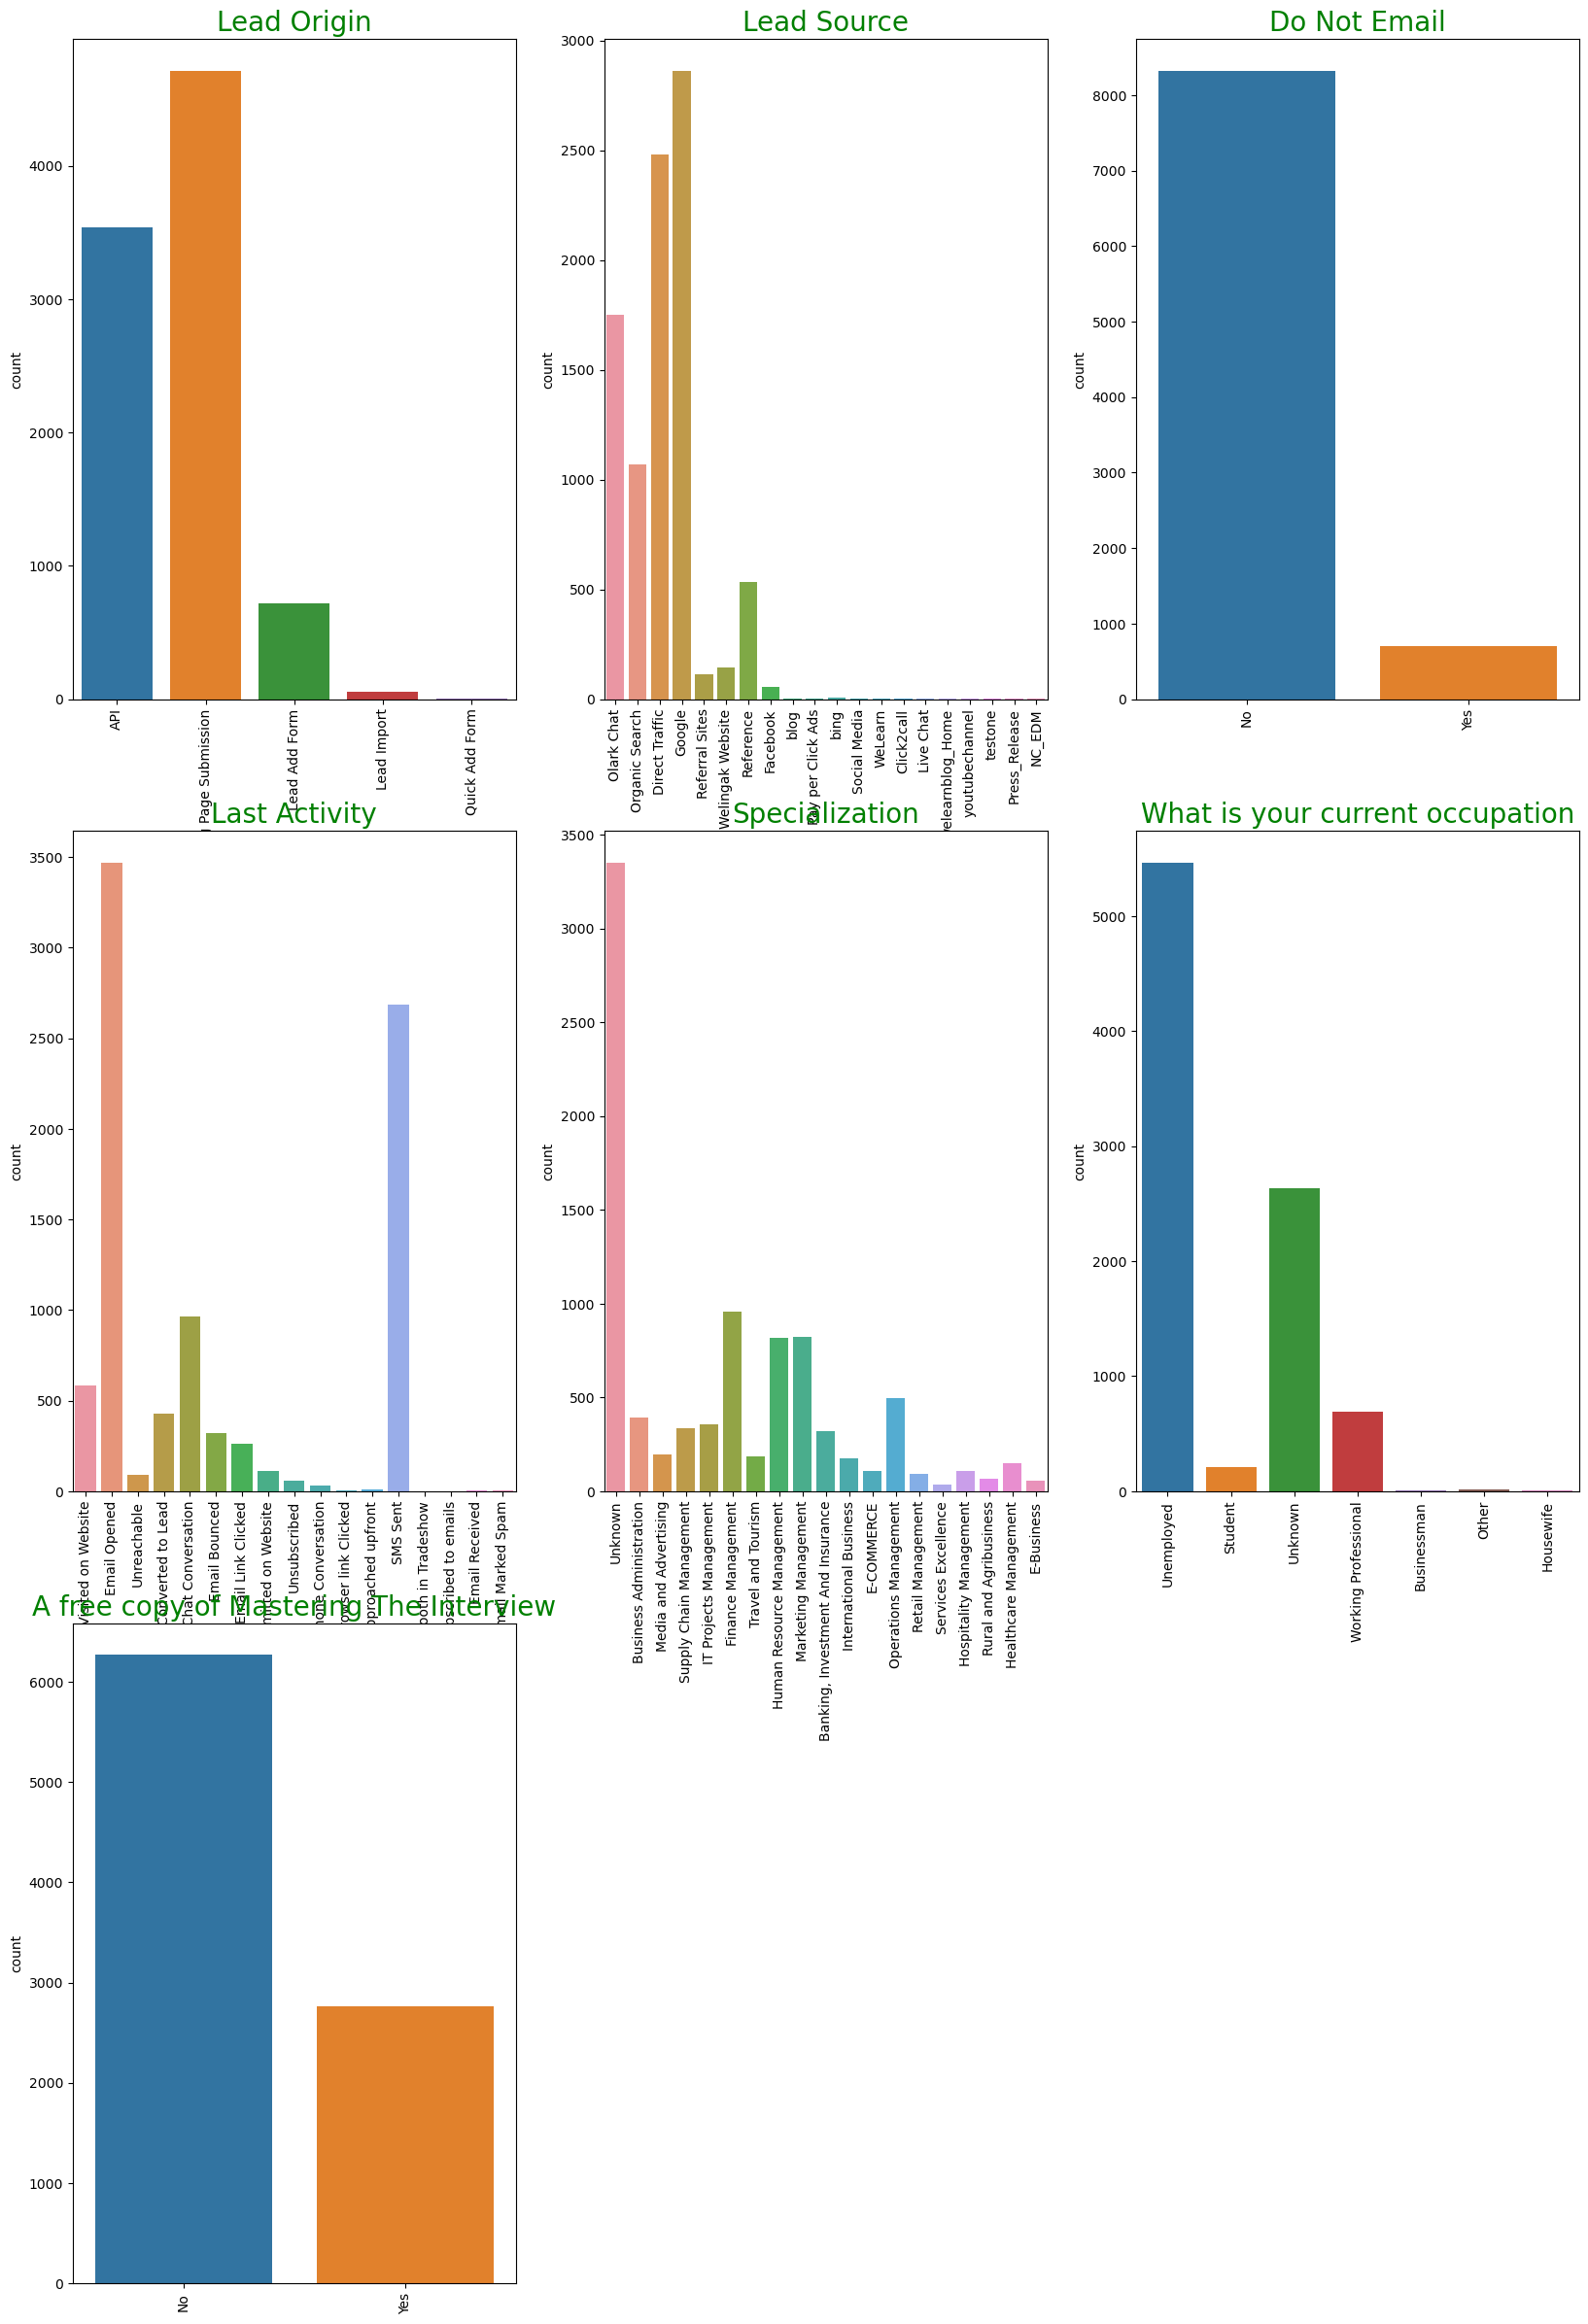

In [48]:
# Countplot for all the categorical columns
cat_colslist= ['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'A free copy of Mastering The Interview']

plt.figure(figsize=(20, 30))
for i,j in enumerate(cat_colslist):
    plt.subplot(3,3,i+1)
    sns.countplot(x=df[j])
    plt.xticks(rotation=90);
    plt.xlabel(None)
    plt.title(j,fontsize=20,color='green')
plt.show()

- Lead Origin :  Highest number of customers are from Landing Page submission followed by API
- Lead Source: Maximum number of customers are from Google followed by direct traffic
- Do Not Email : Most number of customers have opted that they do not want to be emailed about the course
- What is your current ocuupation: Most of the customers are Unemployed
- Last Activity : Last activity performed by most of the customers is SMS sent and Email Opened activities

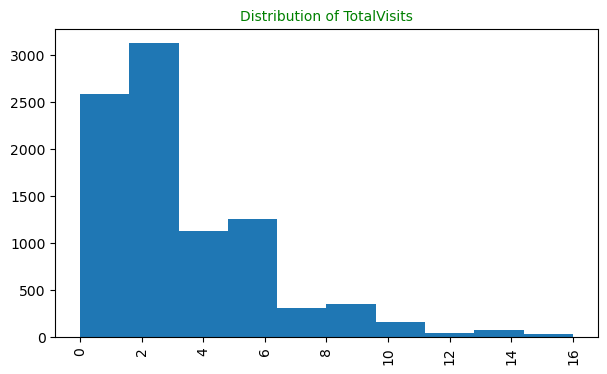

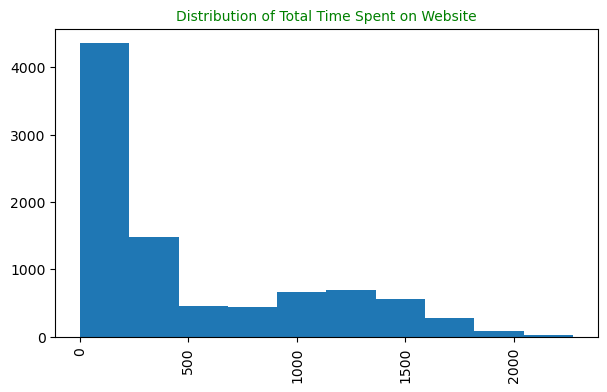

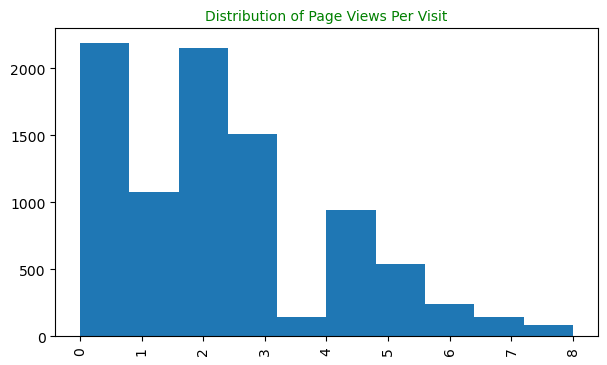

In [49]:
# Checking the distribution of the numerical columns

num_list=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']                     
for i in num_list:
    plt.figure(figsize=[7,4])
    plt.title("Distribution of {}".format(i),color="green",fontsize=10)
    plt.hist(df[i])
    plt.xticks(rotation=90)
    plt.show()
    

### Bivariate Analysis

In [50]:
# defining a function to get the countplot of columns
def bivariate_categorical(col1,col2):   
       
    fig = plt.figure(figsize=(18,8))
    
    ax1 = plt.subplot(121)
    sns.countplot(data=df, x=col1, hue="Converted")
    plt.title("Distribution of {}".format(col1),color="green",fontsize=18)
    plt.xticks(rotation=90);
    
    ax2 = plt.subplot(122)
    sns.countplot(data=df, x=col2, hue="Converted")
    plt.title("Distribution of {}".format(col2),color="green",fontsize=18)
    plt.xticks(rotation=90);
    
    fig.tight_layout()
    plt.show()

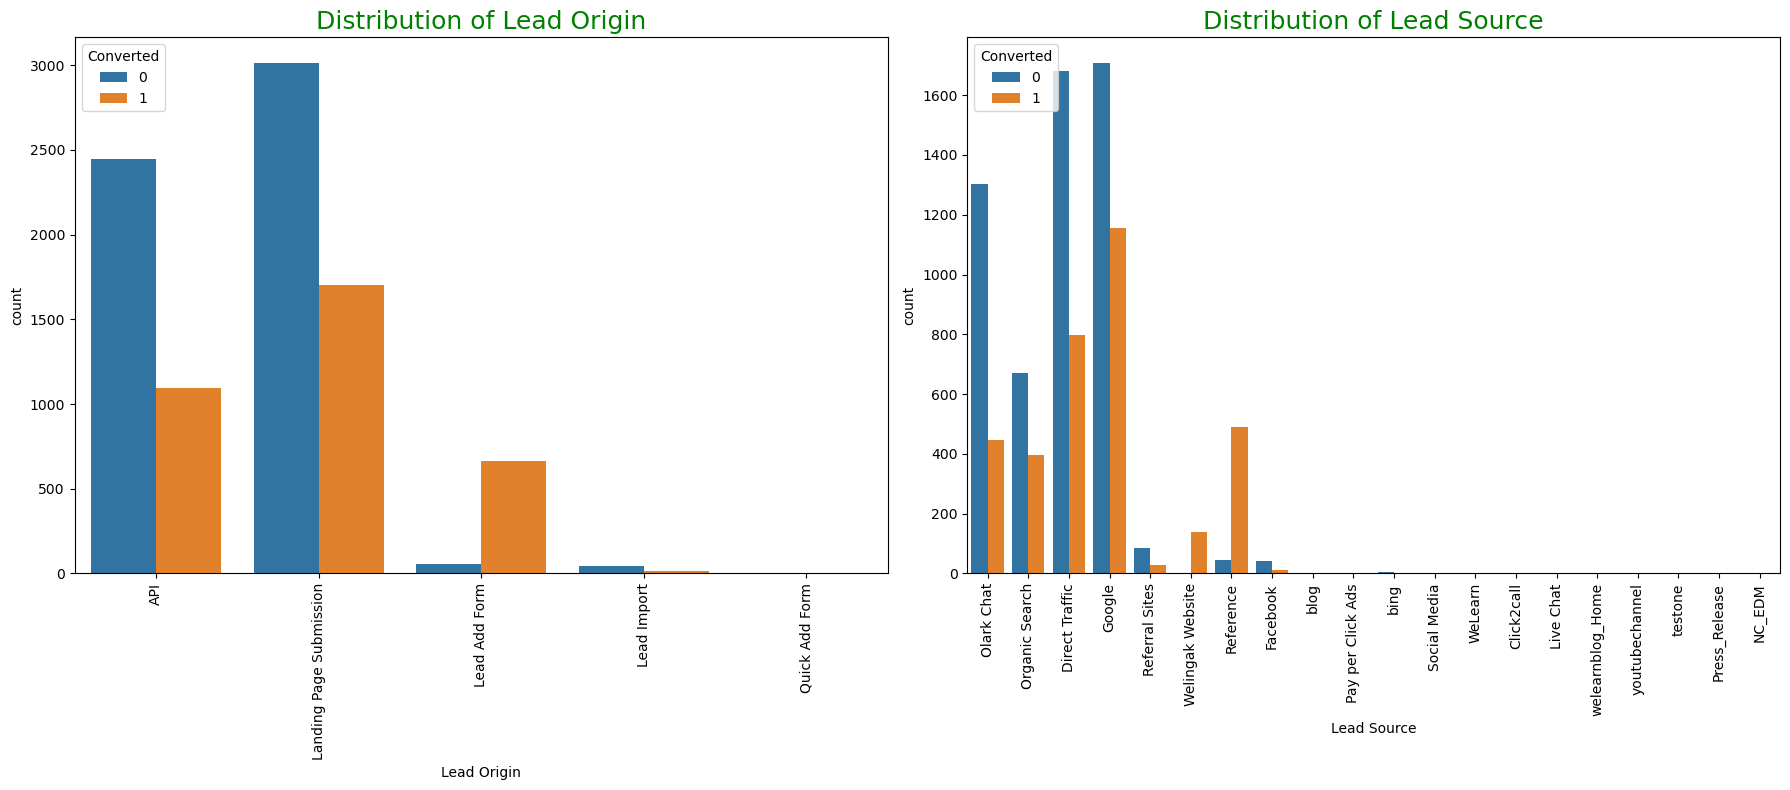

In [51]:
bivariate_categorical('Lead Origin','Lead Source')

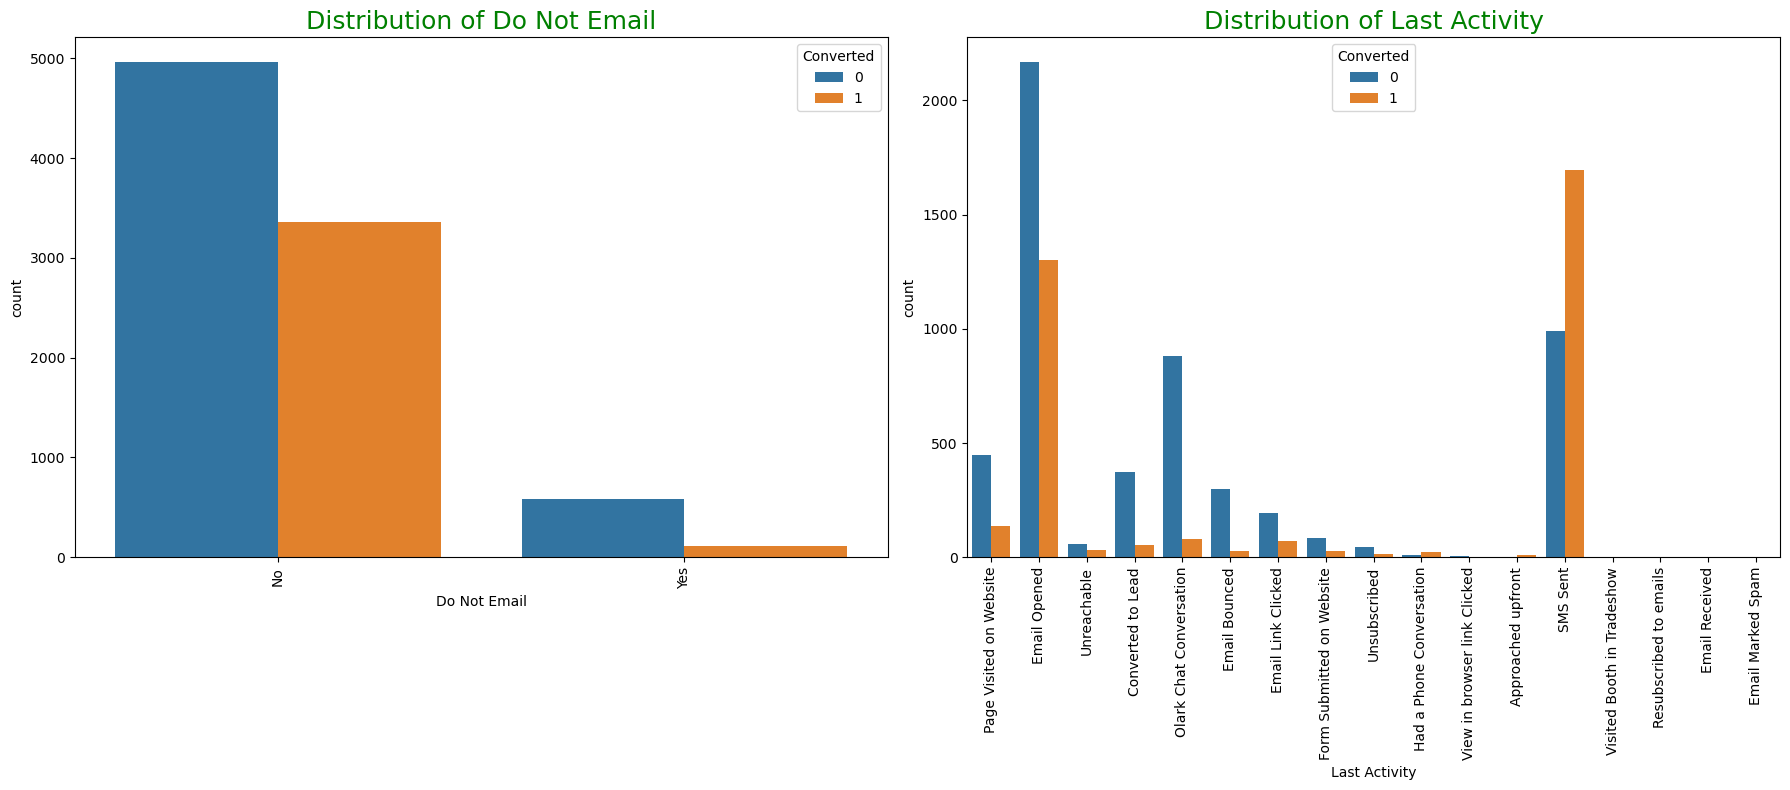

In [52]:
bivariate_categorical('Do Not Email','Last Activity')

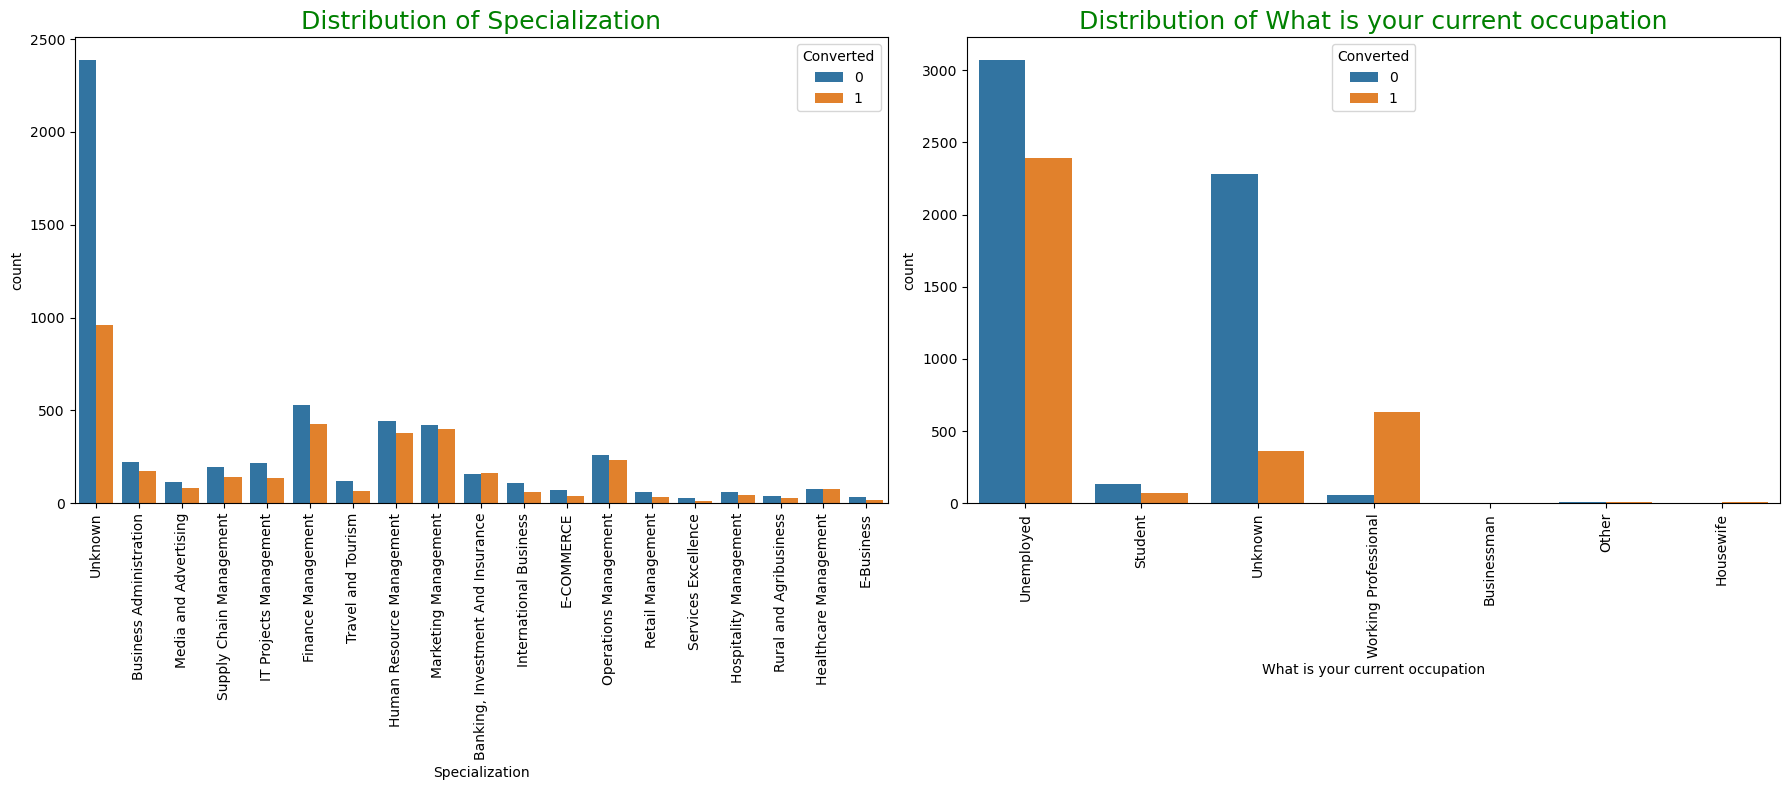

In [53]:
bivariate_categorical('Specialization','What is your current occupation')

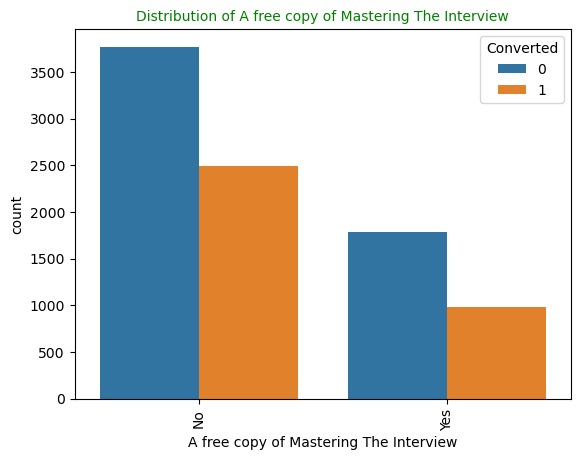

In [54]:
sns.countplot(data=df, x='A free copy of Mastering The Interview', hue="Converted")
plt.title("Distribution of A free copy of Mastering The Interview",color="green",fontsize=10)
plt.xticks(rotation=90);

In [55]:
# Defining a function to get the count and the % of Leadconversion of a particular column
def count_percentage_leadconversion(column):   
    col = column   
    fig = plt.figure(figsize=(12,8))
    
    ax1 = plt.subplot(221)
    df[col].value_counts(normalize=True).plot.bar();
    plt.title("Total count in the {}".format(col),color="green",fontsize=12)
    plt.xlabel(col);
    
    ax2 = plt.subplot(222)
    df.groupby(col)["Converted"].mean().plot.bar();
    plt.title("% of Lead conversion in the {}".format(col),color="green",fontsize=12)
    plt.xlabel(col);
    fig.tight_layout()
    plt.show()

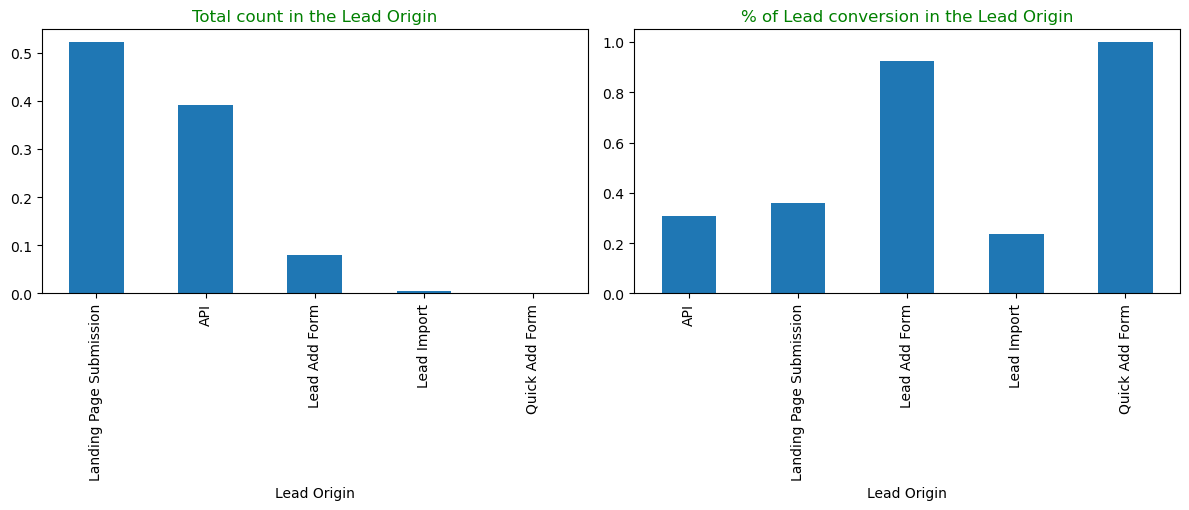

In [56]:
count_percentage_leadconversion('Lead Origin')

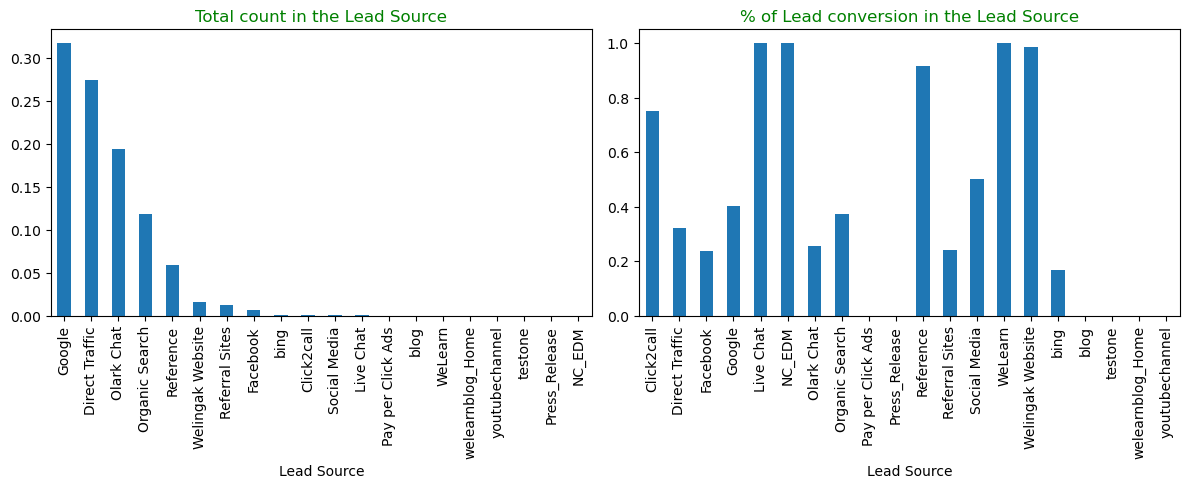

In [57]:
count_percentage_leadconversion('Lead Source')

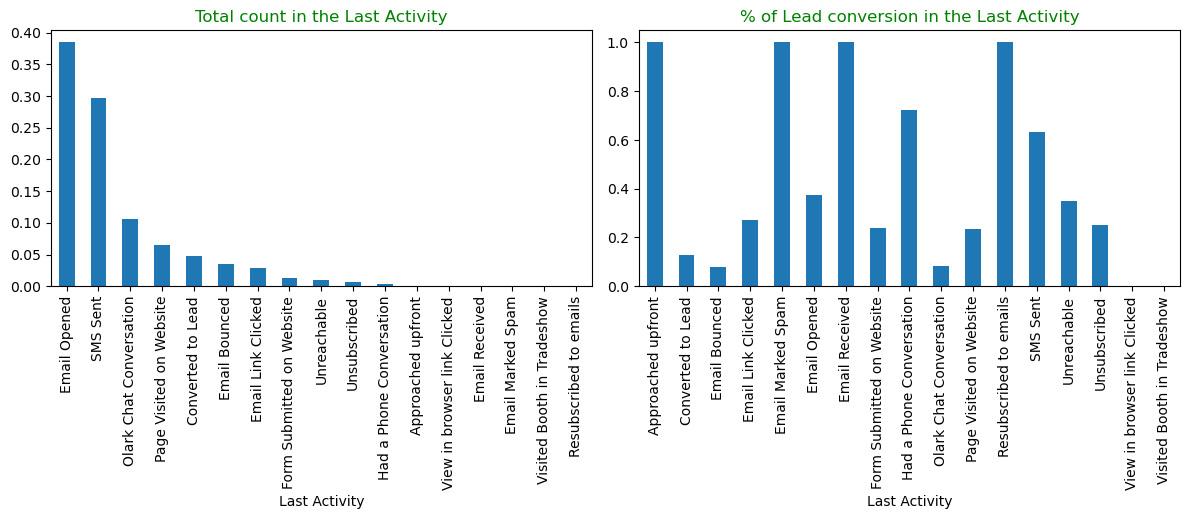

In [58]:
count_percentage_leadconversion('Last Activity')

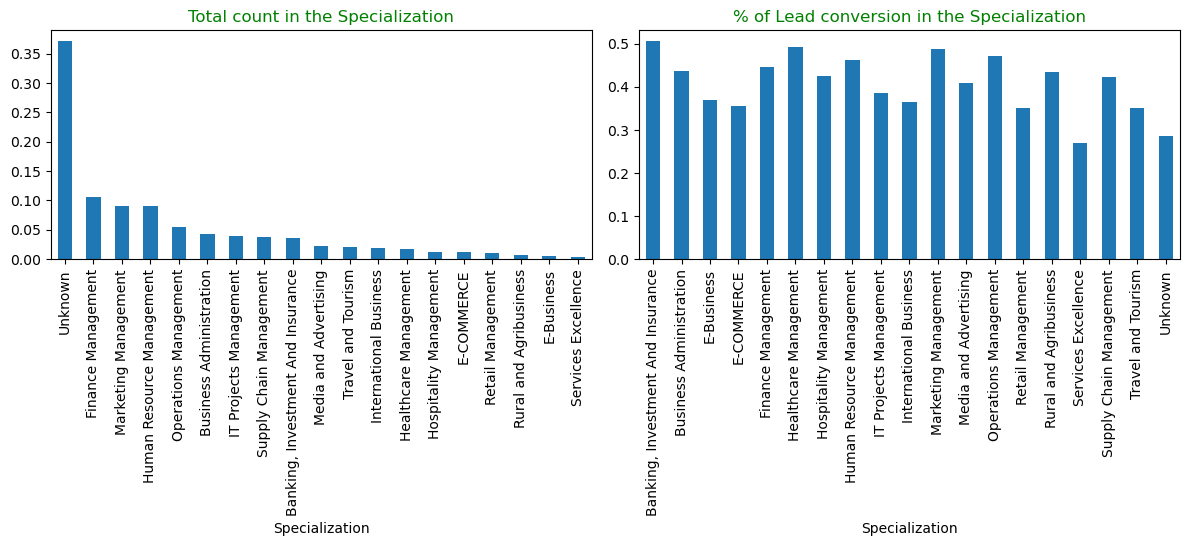

In [59]:
count_percentage_leadconversion('Specialization')

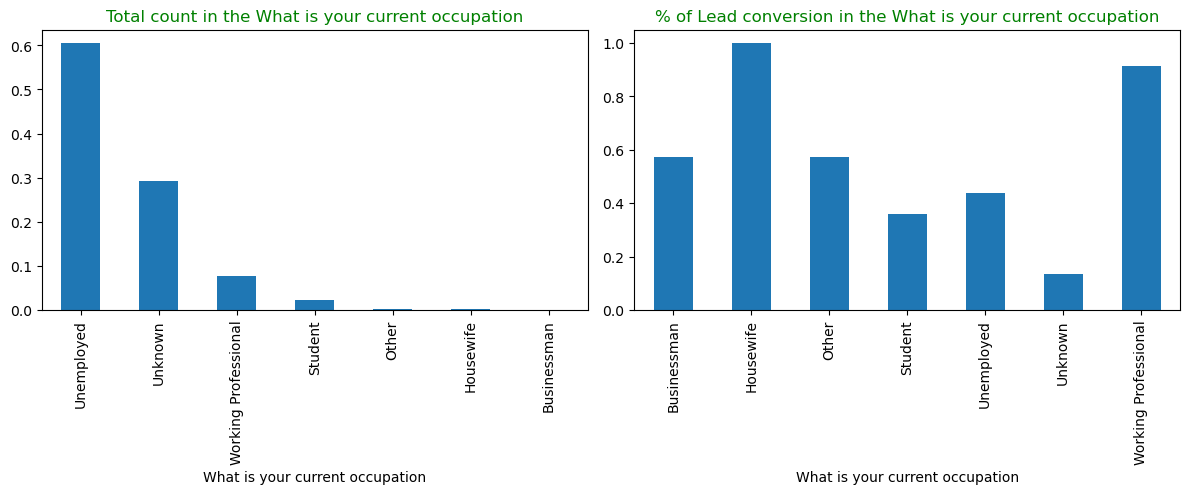

In [60]:
count_percentage_leadconversion('What is your current occupation')

- Lead origin- Many leads have originated from Landing Page Submitssion and API
- Lead Source - Google and Direct Traffice have generated many leads but maxiumum % of lead conversion is from Reference and Welingak Website
- Lead Activity- SMS sent has the high percentage of Lead Convertion Rate
- Current Occupation- Many leads are from Unemployed but Working Professionals contribute to highest % of lead conversion
- Specialization - Marketing Management, HR Management and Finance Management have originated good number of leads

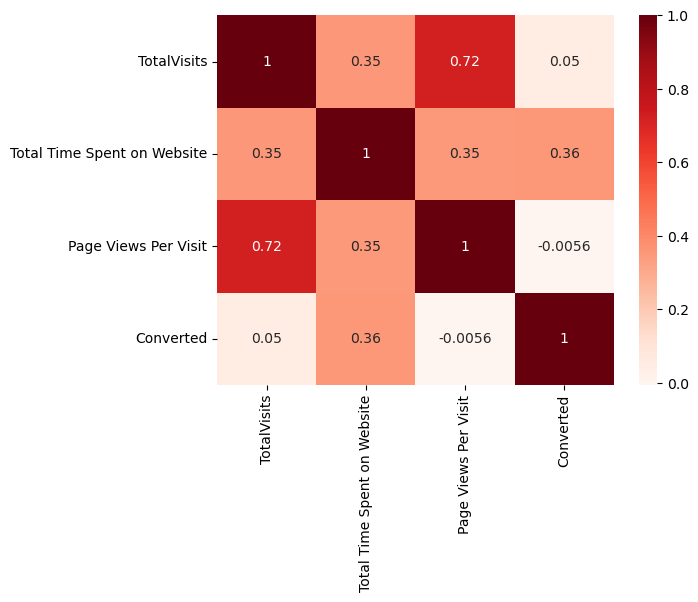

In [61]:
#plotting the correlation matrix of the numerical column
df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']] .corr()

sns.heatmap(df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']].corr(),annot=True,cmap="Reds");

- Total Visits and Page Views Per Visit have good correlation

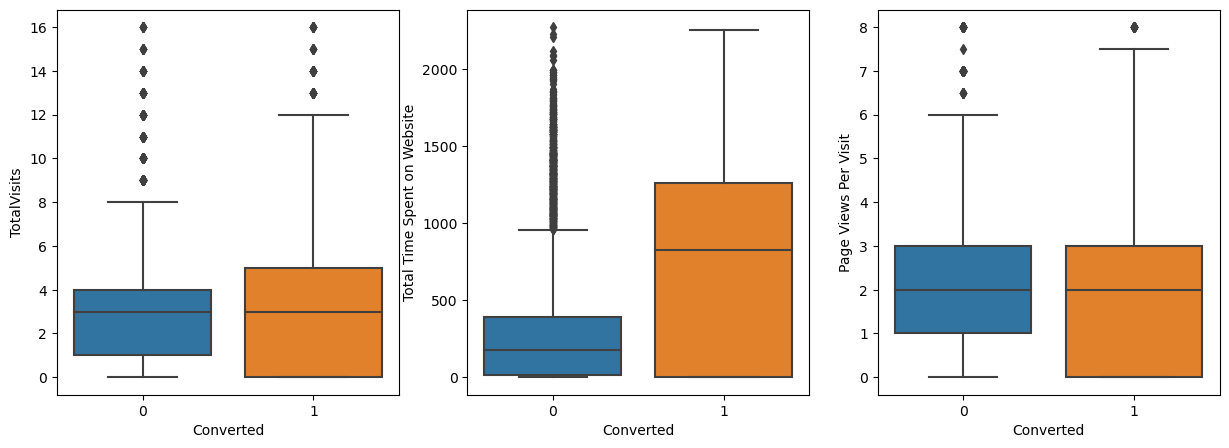

In [62]:
# Boxplot with Converted as hue

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)           
sns.boxplot(data=df,x="Converted",y="TotalVisits");
plt.subplot(1,3,2)           
sns.boxplot(data=df,x="Converted",y="Total Time Spent on Website");
plt.subplot(1,3,3)           
sns.boxplot(data=df,x="Converted",y="Page Views Per Visit");
plt.show()

- Leads who spend more time on Website have high conversion rate

### Step 5: Data Preparation


In [63]:
df.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                  Unknown   
1             Email Opened                  Unknown   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                  Unknown   

  What is your current occupation A free copy of Mastering The Interview  
0                      Unemployed                                     No  
1                      Unemployed                                     No  
2                         Student                                    Yes  
3                      Unemployed                                     No  
4                      Unemployed                                     No

#### Converting some binary variables (Yes/No) to 1/0

In [64]:
# List of variables to map

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function 
df[varlist] = df[varlist].apply(binary_map)

In [65]:
df.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                  Unknown   
1             Email Opened                  Unknown   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                  Unknown   

  What is your current occupation  A free copy of Mastering The Interview  
0                      Unemployed                                       0  
1                      Unemployed                                       0  
2                         Student                                       1  
3                      Unemployed                                       0  
4                      Unemployed                                       0

#### Creating  Dummy variables 

##### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [66]:
# To get the list of Categorical columns
cat_cols=df. dtypes[df. dtypes == 'object']
cat_colslist=cat_cols.index.tolist()
cat_colslist

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation']

In [67]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy= pd.get_dummies(df[['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy], axis=1)


In [68]:
df.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                  Unknown   
1             Email Opened                  Unknown   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                  Unknown   

  What is your current occupation  A free copy of Mastering The Interview  \
0                      Unemployed                                       0   
1                      Unemployed                                       0   
2                         Student                                       1   
3                      Unemployed                                       0   
4                      Unemployed                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
0                      0                   0                       1   
1                      0                   0                       0   
2                      0                   0                       0   
3                      0                   0                       0   
4                      0                   0                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead Source_Press_Release  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_

In [69]:
# We have created dummies for the below variables, so we can drop them
df = df.drop(['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation'], 1)

In [70]:
df.shape

(9029, 69)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 69 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9029 non-null   int64  
 1   Converted                                             9029 non-null   int64  
 2   TotalVisits                                           9029 non-null   float64
 3   Total Time Spent on Website                           9029 non-null   int64  
 4   Page Views Per Visit                                  9029 non-null   float64
 5   A free copy of Mastering The Interview                9029 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9029 non-null   uint8  
 7   Lead Origin_Lead Add Form                             9029 non-null   uint8  
 8   Lead Origin_Lead Import                               9029

###  Test-Train Split

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
# Putting predictor variables to X
X = df.drop('Converted', axis=1)

X.head()

# Putting response Target variable to y
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [74]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [75]:
print("X_Train", X_train.shape,"y_Train",y_train.shape)

X_Train (6320, 68) y_Train (6320,)


In [76]:
print("X_Test", X_test.shape,"y_Test",y_test.shape)

X_Test (2709, 68) y_Test (2709,)


###  Feature Scaling

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
df.head()

Do Not Email  Converted  TotalVisits  Total Time Spent on Website  \
0             0          0          0.0                            0   
1             0          0          5.0                          674   
2             0          1          2.0                         1532   
3             0          0          1.0                          305   
4             0          1          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
0                      0                   0                       1   
1                      0                   0                       0   
2                      0                   0                       0   
3                      0                   0                       0   
4                      0                   0                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead Source_Press_Release  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_blog  \
0                             0                 0                 0   
1                             0                 0                 0   
2                             0                 0                 0   
3                             0       

In [79]:
# Fetching all the numeric columns of type int64 and float64 from dataframe for scaling
num_cols=X_train.select_dtypes(include=['int64','float64']).columns
num_cols

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview'],
      dtype='object')

In [80]:
# Using standard scalar for scaling the features

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
5493     -0.290871    -0.394290                    -0.708153   
8064     -0.290871    -0.039721                    -0.711823   
4716      3.437946    -0.039721                    -0.471434   
9117     -0.290871    -1.103429                    -0.884316   
2402     -0.290871     1.023987                     0.704822   

      Page Views Per Visit  A free copy of Mastering The Interview  \
5493             -0.135234                                1.504253   
8064              0.410454                               -0.664782   
4716              0.410454                                1.504253   
9117             -1.226608                               -0.664782   
2402             -0.135234                               -0.664782   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
5493                                    1                          0   
8064                                    0                          0   
4716                                    1                          0   
9117                                    0                          0   
2402                                    1                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
5493                        0                           0   
8064                        0                           0   
4716                        0                           0   
9117                        0                           0   
2402                        0                           0   

      Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
5493                           1                     0                   0   
8064                           1                     0                   0   
4716                           0                     0                   0   
9117                           0                     0                   0   
2402                           0                     0                   1   

      Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
5493                      0                   0                       0   
8064                      0                   0                       0   
4716                      0                   0                       0   
9117                      0                   0                       1   
2402                      0                   0                       0   

      Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
5493                           0                              0   
8064                           0                              0   
4716                           1                              0   
9117                           0                              0   
2402                           0                              0   

      Lead Source_Press_Release  Lead Source_Reference  \
5493                          0                      0   
8064                          0                      0   
4716                          0                      0   
9117                          0                      0   
2402                          0                      0   

      Lead Source_Referral Sites  Lead Source_Social Media  \
5493                           0                         0   
8064                           0                         0   
4716                           0                         0   
9117                           0                         0   
2402                           0                         0   

      Lead Source_WeLearn  Lead Source_Welingak Website  Lead Source_bing  \
5493                    0                             0                 0   
8064                    0                             0                 0   
4716                    0                             0                 0   
9117                    0                      

In [81]:
### Checking the Lead Conversion Rate
lcr = (sum(df['Converted'])/len(df['Converted'].index))*100
lcr

38.50924797873519

- We have 38.5% Conversion Rate

#### Looking at Correlations

In [82]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

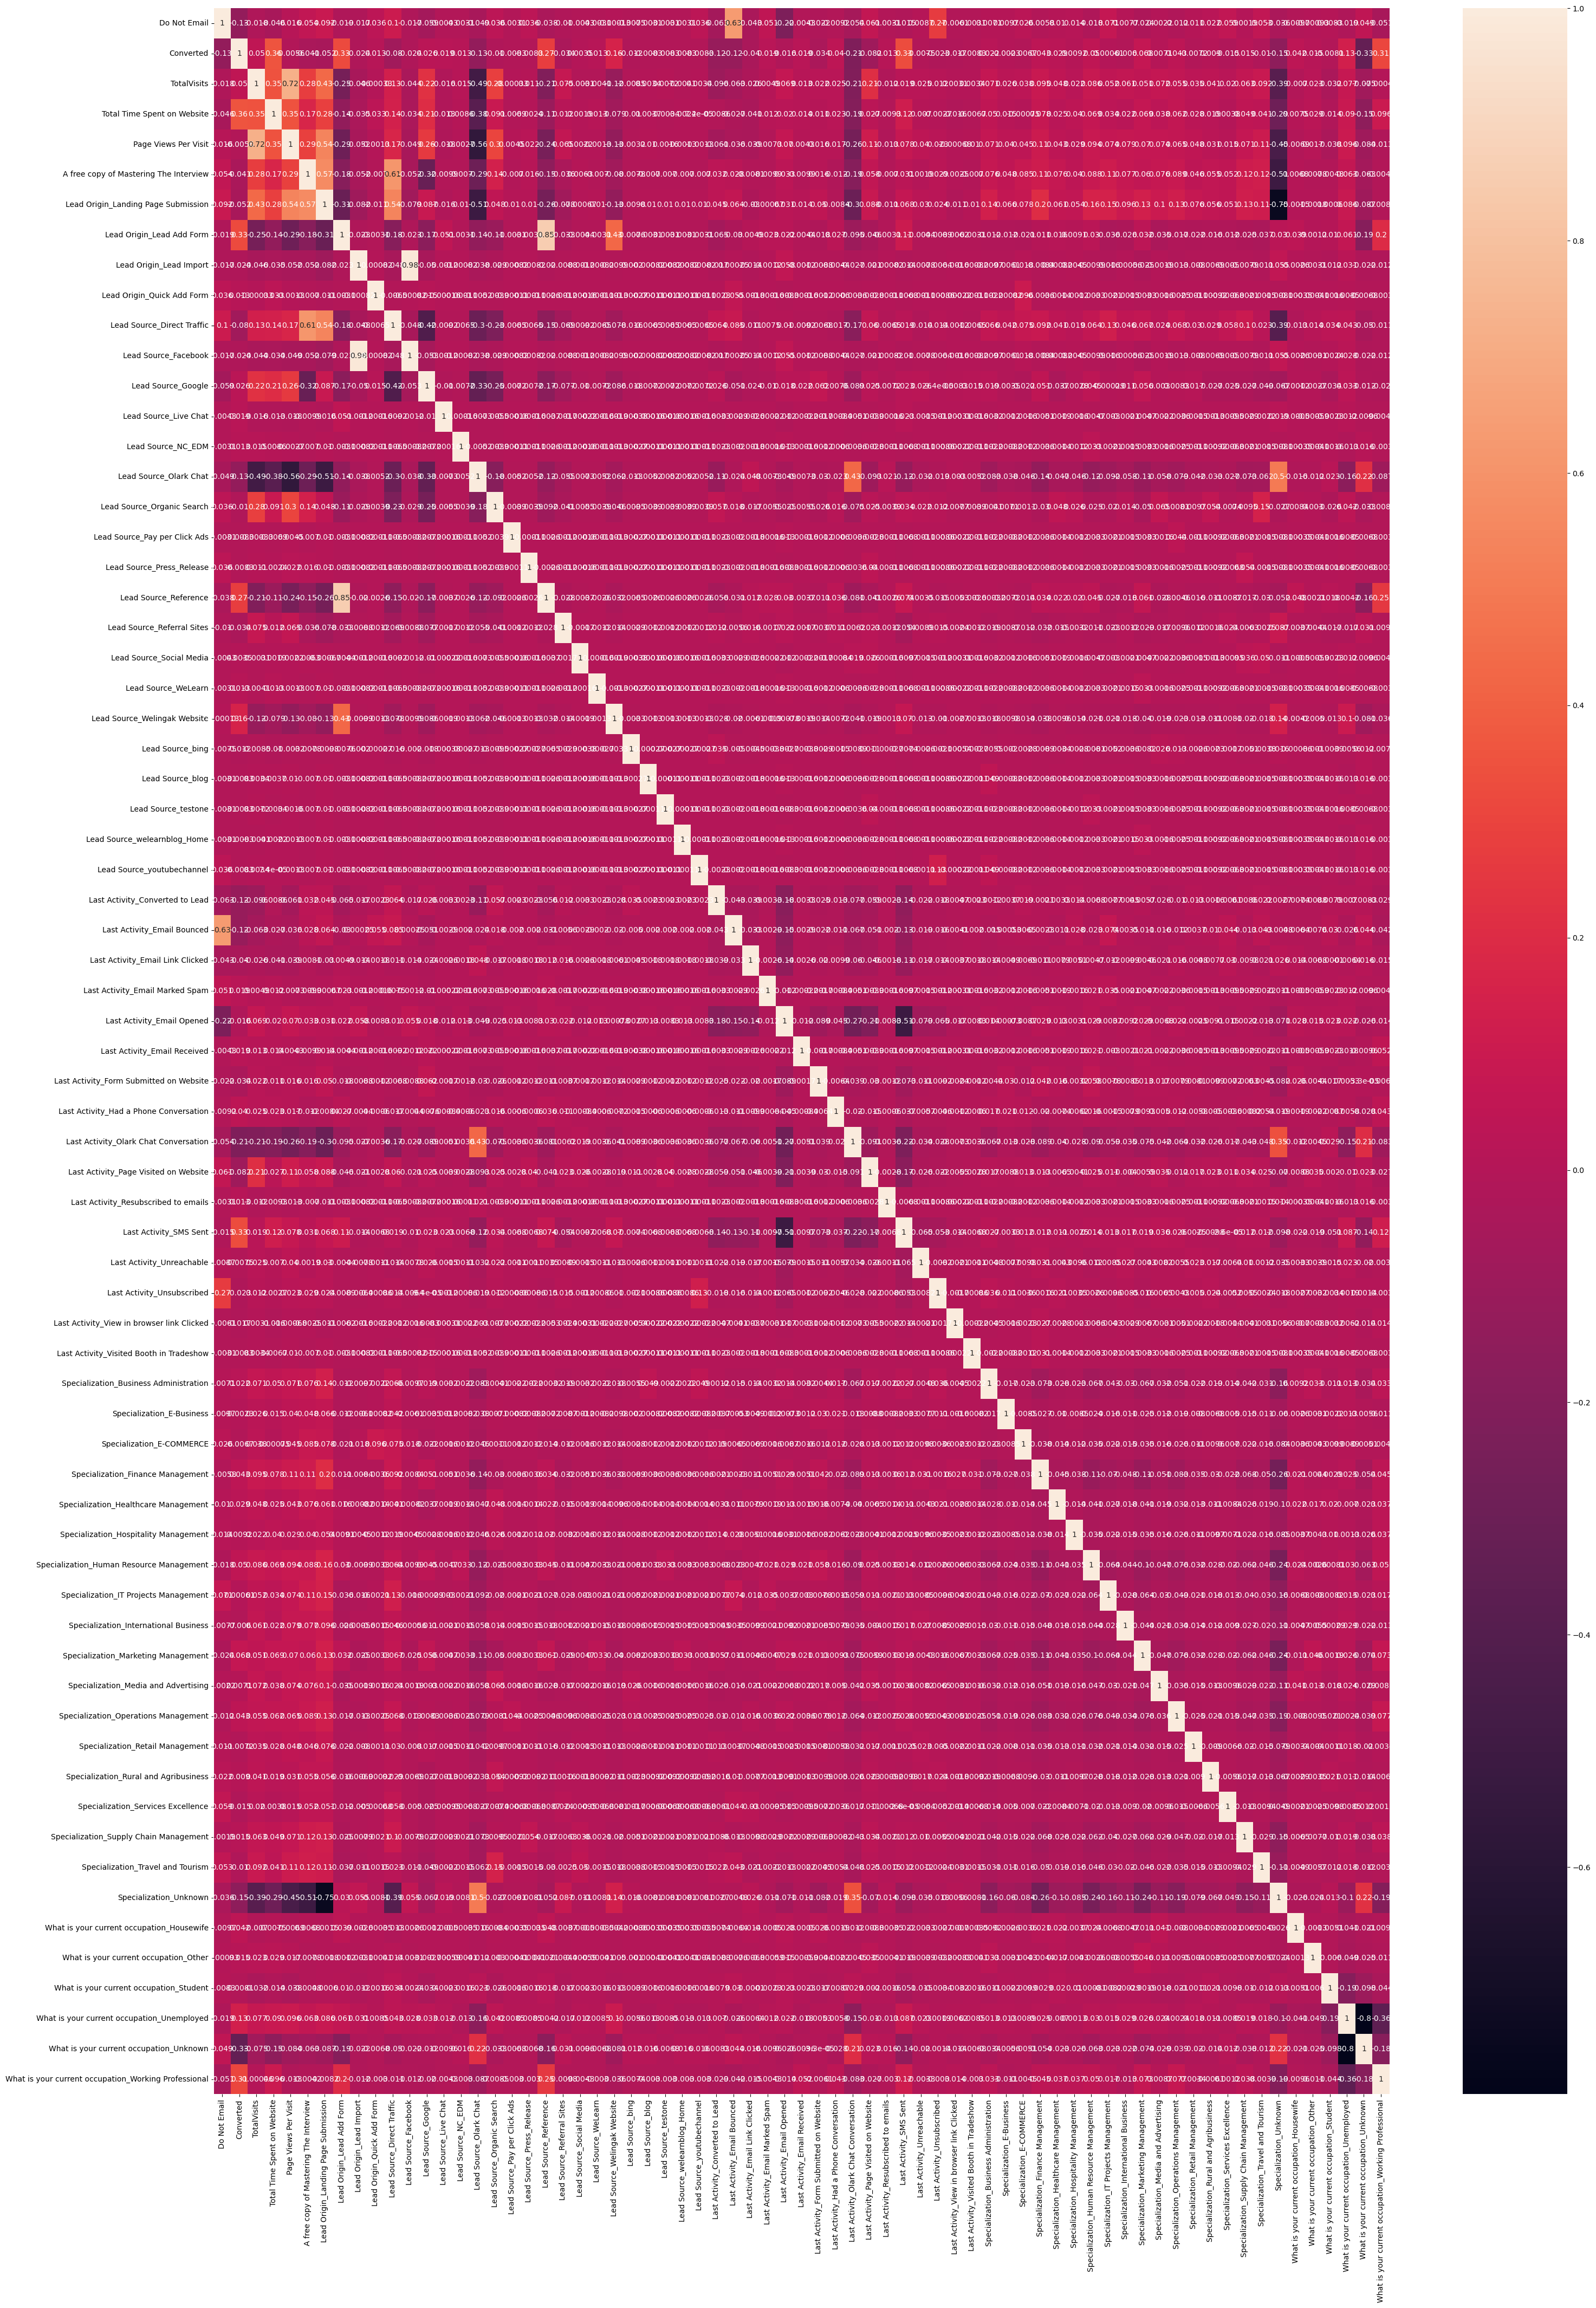

In [83]:
# Let's see the correlation matrix 
plt.figure(figsize = (35,50))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

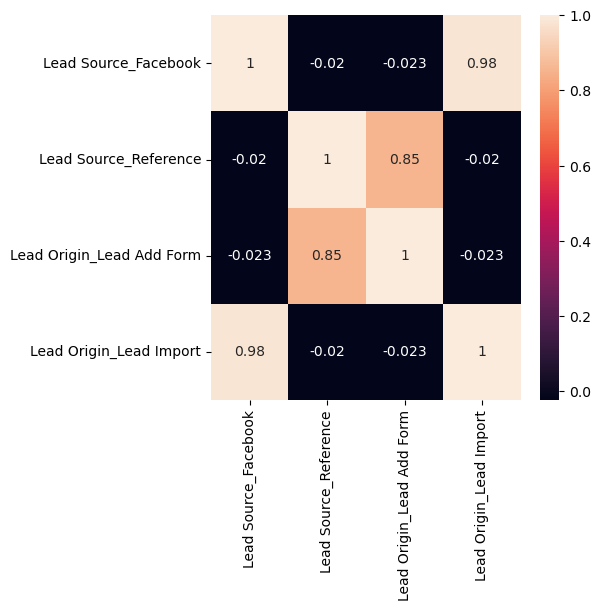

In [84]:
# The above heatmap has many columns, so we cannot drop all the correlated varialbes. So lets breakdown the highly suspected variables that looks to be highly correlated.
plt.figure(figsize = (5,5))        # Size of the figure
sns.heatmap(df[['Lead Source_Facebook','Lead Source_Reference','Lead Origin_Lead Add Form','Lead Origin_Lead Import']].corr(),annot = True)
plt.show()

- Lead Origin_Lead Add Form and Lead Source_ Reference are highly correlated (0.85 %) 
- Lead Origin_Lead Import and lead Source _Facebook are highly correlated(0.98%)
- So we can drop one of these columns that are highly correlated
- We are dropping the columns Lead Origin_Lead Add Form and Lead Origin_Lead Import

In [85]:
# Dropping Highly related dummy variables 

X_test = X_test.drop(['Lead Origin_Lead Add Form','Lead Origin_Lead Import'], 1)
X_train = X_train.drop(['Lead Origin_Lead Add Form','Lead Origin_Lead Import'], 1)

### Step 6: Model Building

#### Running Your First Training Model

In [86]:
import statsmodels.api as sm

In [87]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6256
Model Family:                Binomial   Df Model:                           63
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 15 Jul 2023   Deviance:                   1.1421e+05
Time:                        22:27:46   Pearson chi2:                 5.58e+18
No. Iterations:                    25   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 2.943e+15   5.57e+07   5.29e+07      0.000    2.94e+15    2.94e+15
Do Not Email                                         -2.677e+14   1.22e+06  -2.19e+08      0.000   -2.68e+14   -2.68e+14
TotalVisits                                           1.504e+14   1.31e+06   1.15e+08      0.000     1.5e+14     1.5e+14
Total Time Spent on Website                           4.665e+14   9.69e+05   4.82e+08      0.000    4.67e+14    4.67e+14
Page Views Per Visit                                  -1.21e+14   1.44e+06  -8.41e+07      0.000   -1.21e+14   -1.21e+14
A free copy of Mastering The Interview               -3.523e+13   1.26e+06   -2.8e+07      0.000   -3.52e+13   -3.52e+13
Lead Origin_Landing Page Submission                  -4.973e+14   3.42e+06  -1.46e+08      0.000   -4.97e+14   -4.97e+14
Lead Origin_Quick Add Form                               3.1161   3.73e-07   8.36e+06      0.000       3.116       3.116
Lead Source_Direct Traffic                            1.176e+13   3.91e+07   3.01e+05      0.000    1.18e+13    1.18e+13
Lead Source_Facebook                                  8.351e+13   4.03e+07   2.07e+06      0.000    8.35e+13    8.35e+13
Lead Source_Google                                    6.108e+13    3.9e+07   1.57e+06      0.000    6.11e+13    6.11e+13
Lead Source_Live Chat                                 4.728e+15   6.14e+07    7.7e+07      0.000    4.73e+15    4.73e+15
Lead Source_NC_EDM                                    5.039e+15   7.76e+07   6.49e+07      0.000    5.04e+15    5.04e+15
Lead Source_Olark Chat                                1.941e+14    3.9e+07   4.98e+06      0.000    1.94e+14    1.94e+14
Lead Source_Organic Search                           -5.527e+13   3.91e+07  -1.41e+06      0.000   -5.53e+13   -5.53e+13
Lead Source_Pay per Click Ads                          -11.1223   2.75e-07  -4.05e+07      0.000     -11.122     -11.122
Lead Source_Press_Release                             2.252e+15    7.8e+07   2.89e+07      0.000    2.25e+15    2.25e+15
Lead Source_Reference                                 1.434e+15    3.9e+07   3.67e+07      0.000    1.43e+15    1.43e+15
Lead Source_Referral Sites                           -1.947e+14   3.97e+07   -4.9e+06      0.000   -1.95e+14   -1.95e+14
Lead Source_Social Media                              5.138e+14   6.15e+07   8.35e+06      0.000    5.14e+14    5.14e+14
Lead Source_WeLearn                                   4.448e+15   7.77e+07   5.73e+07      0.000    4.45e+15    4.45e+15
Lead Source_Welingak Website                          4.541e+15   3.95e+07   1.15e+08      0.000    4.54e+15    4.54e+15
Lead Source_bing                                      1.75

### Feature Selection Using RFE

In [88]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [89]:
# Lets use RFE to reduce the number of variables
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=15)  
rfe = rfe.fit(X_train, y_train)

In [90]:
rfe.support_

array([False, False,  True, False, False, False, False,  True,  True,
        True, False, False, False,  True, False, False,  True,  True,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False,  True,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True,  True])

In [91]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 17),
 ('TotalVisits', False, 20),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('A free copy of Mastering The Interview', False, 41),
 ('Lead Origin_Landing Page Submission', False, 3),
 ('Lead Origin_Quick Add Form', False, 50),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 6),
 ('Lead Source_NC_EDM', False, 11),
 ('Lead Source_Olark Chat', False, 46),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 51),
 ('Lead Source_Press_Release', False, 37),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 26),
 ('Lead Source_WeLearn', False, 33),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 42),
 ('Lead Source_blog', False, 21),
 ('Lead Source_testone', False, 52),
 ('Lead Source_welearnblog_Home', False, 28

In [92]:
# Columns selected by RFE

col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Unknown',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [93]:
# Columns that are not selected by RFE

X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Quick Add Form',
       'Lead Source_Live Chat', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last A

##### Assessing the model with StatsModels

### Model 1

In [94]:
# Building model using stats model fro detailed statustucs
# Adding a constant variable 
import statsmodels.api as sm  
X_train_sm1 = sm.add_constant(X_train[col])

In [95]:
# Create a fitted model

logm1 = sm.GLM(y_train,X_train_sm1, family = sm.families.Binomial())
res = logm1.fit()

# To check the summary of our logistic regression model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2627.2
Date:                Sat, 15 Jul 2023   Deviance:                       5254.4
Time:                        22:27:50   Pearson chi2:                 7.37e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3924
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2550      0.097      2.639      0.008       0.066       0.444
Total Time Spent on Website                              1.0835      0.040     27.274      0.000       1.006       1.161
Lead Source_Direct Traffic                              -1.6766      0.117    -14.273      0.000      -1.907      -1.446
Lead Source_Facebook                                    -1.3761      0.434     -3.172      0.002      -2.226      -0.526
Lead Source_Google                                      -1.1904      0.112    -10.671      0.000      -1.409      -0.972
Lead Source_Organic Search                              -1.5047      0.137    -11.012      0.000      -1.773      -1.237
Lead Source_Reference                                    1.9501      0.222      8.775      0.000       1.514       2.386
Lead Source_Referral Sites                              -1.5244      0.349     -4.365      0.000      -2.209      -0.840
Lead Source_Welingak Website                             4.0598      0.727      5.588      0.000       2.636       5.484
Last Activity_Email Bounced                             -1.5365      0.293     -5.252      0.000      -2.110      -0.963
Last Activity_Had a Phone Conversation                   1.6054      0.570      2.817      0.005       0.489       2.722
Last Activity_Olark Chat Conversation                   -1.3477      0.162     -8.300      0.000      -1.666      -1.029
Last Activity_SMS Sent                                   1.3003      0.075     17.375      0.000       1.154       1.447
What is your current occupation_Housewife               23.1000   1.72e+04      0.001      0.999   -3.37e+04    3.38e+04
What is your current occupation_Unknown                 -1.3065      0.087    -14.972      0.000      -1.477      -1.135
What is your current occupation_Working Professional     2.3464      0.179     13.093      0.000       1.995       2.698
========================================================================================================================
"""

- 'What is your current occupation_Housewife ' can removed due to its high p-value of 0.9999

##### Checking VIF's

In [96]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11                             Last Activity_SMS Sent  1.45
13            What is your current occupation_Unknown  1.45
3                                  Lead Source_Google  1.37
1                          Lead Source_Direct Traffic  1.30
14  What is your current occupation_Working Profes...  1.19
0                         Total Time Spent on Website  1.18
10              Last Activity_Olark Chat Conversation  1.17
5                               Lead Source_Reference  1.16
4                          Lead Source_Organic Search  1.13
8                         Last Activity_Email Bounced  1.07
7                        Lead Source_Welingak Website  1.03
6                          Lead Source_Referral Sites  1.01
9              Last Activity_Had a Phone Conversation  1.01
2                                Lead Source_Facebook  1.00
12          What is your current occupation_Housewife  1.00

- VIF's seems fine but the P-values are not- So  Removing 'What is your current occupation_Housewife ' 

### Model 2

In [97]:
# Dropping 'What is your current occupation_Housewife '  column
col=col.drop("What is your current occupation_Housewife")

In [98]:
col

Index(['Total Time Spent on Website', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Unknown',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [99]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_sm2 = sm.add_constant(X_train[col])

# Create a fitted model

logm2 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial())
res = logm2.fit()

# To check the summary of our logistic regression model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2632.4
Date:                Sat, 15 Jul 2023   Deviance:                       5264.8
Time:                        22:27:50   Pearson chi2:                 7.38e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3914
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2585      0.097      2.676      0.007       0.069       0.448
Total Time Spent on Website                              1.0832      0.040     27.295      0.000       1.005       1.161
Lead Source_Direct Traffic                              -1.6738      0.117    -14.260      0.000      -1.904      -1.444
Lead Source_Facebook                                    -1.3767      0.434     -3.174      0.002      -2.227      -0.527
Lead Source_Google                                      -1.1877      0.111    -10.653      0.000      -1.406      -0.969
Lead Source_Organic Search                              -1.4929      0.136    -10.948      0.000      -1.760      -1.226
Lead Source_Reference                                    1.9577      0.222      8.814      0.000       1.522       2.393
Lead Source_Referral Sites                              -1.5254      0.349     -4.368      0.000      -2.210      -0.841
Lead Source_Welingak Website                             4.0582      0.727      5.585      0.000       2.634       5.482
Last Activity_Email Bounced                             -1.5427      0.293     -5.273      0.000      -2.116      -0.969
Last Activity_Had a Phone Conversation                   1.5969      0.570      2.802      0.005       0.480       2.714
Last Activity_Olark Chat Conversation                   -1.3513      0.162     -8.323      0.000      -1.670      -1.033
Last Activity_SMS Sent                                   1.2941      0.075     17.307      0.000       1.148       1.441
What is your current occupation_Unknown                 -1.3100      0.087    -15.020      0.000      -1.481      -1.139
What is your current occupation_Working Professional     2.3410      0.179     13.066      0.000       1.990       2.692
========================================================================================================================
"""

In [100]:
# Checking vid's again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11                             Last Activity_SMS Sent  1.45
12            What is your current occupation_Unknown  1.45
3                                  Lead Source_Google  1.37
1                          Lead Source_Direct Traffic  1.30
13  What is your current occupation_Working Profes...  1.19
0                         Total Time Spent on Website  1.18
10              Last Activity_Olark Chat Conversation  1.17
5                               Lead Source_Reference  1.16
4                          Lead Source_Organic Search  1.13
8                         Last Activity_Email Bounced  1.07
7                        Lead Source_Welingak Website  1.03
6                          Lead Source_Referral Sites  1.01
9              Last Activity_Had a Phone Conversation  1.01
2                                Lead Source_Facebook  1.00

- In Model 2: All the Vif values are good and all the p-values are below 0.05. So, we can go ahead and use this model for further analysis

## Step 7: Model Evaluation

- Confusion Matrix
- Accuracy
- Sensitivity and Specificity
- Threshold determination using ROC and Finding Optimal cutoff point
- Precision and Recall

In [101]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm2)
y_train_pred[:10]

5493    0.101349
8064    0.100987
4716    0.146669
9117    0.331964
2402    0.458673
1796    0.033547
1120    0.033547
253     0.051623
1491    0.055806
2004    0.298914
dtype: float64

In [102]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.10134876, 0.10098728, 0.14666948, 0.33196419, 0.45867338,
       0.03354676, 0.03354676, 0.05162252, 0.055806  , 0.29891386])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [103]:
# y_train.values are the actual converted values from df dataset
# y_train_pred are the lead conversion probability predicted by our model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID
0          0        0.101349         5493
1          0        0.100987         8064
2          0        0.146669         4716
3          0        0.331964         9117
4          1        0.458673         2402

In [104]:
# Let's start with the default cutoff Threshold value of 0.5 and add a new feature
# Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted
0          0        0.101349         5493          0
1          0        0.100987         8064          0
2          0        0.146669         4716          0
3          0        0.331964         9117          0
4          1        0.458673         2402          0

#### Confusion Matrix

In [105]:
from sklearn import metrics

In [106]:
# Confusion matrix (Acutal vs Predicted)

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3465  444]
 [ 762 1649]]


In [107]:
# Predicted     not_coverted    converted
# Actual
# not_converted       3465      444
# converted            762      1649  

#### Accuracy

In [108]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8091772151898734


#### Metrics beyond simply accuracy


In [109]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [110]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.683948569058482

In [111]:
# Let us calculate specificity
TN / float(TN+FP)

0.886415963161934

In [112]:
# Calculate false postive rate - predicting conversion when customer has not converted
print(FP/ float(TN+FP))

0.113584036838066


In [113]:
# positive predictive value 
print (TP / float(TP+FP))

0.78786430960344


In [114]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8197303051809794


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [176]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

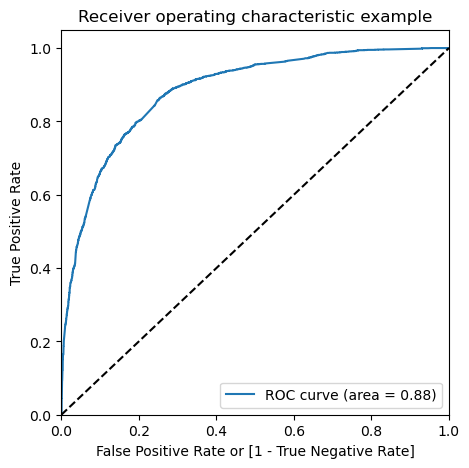

In [177]:
# Plotting ROC curve for Train set

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

- Area under the curve is 0.88 which indicates a good predictive model

### Finding Optimal Cutoff Point

- Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [118]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.101349         5493          0    1    1    0    0    0   
1          0        0.100987         8064          0    1    1    0    0    0   
2          0        0.146669         4716          0    1    1    0    0    0   
3          0        0.331964         9117          0    1    1    1    1    0   
4          1        0.458673         2402          0    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    0    0    0    0    0  
4    0    0    0    0    0

In [119]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381487  1.000000  0.000000
0.1   0.1  0.585918  0.978432  0.343822
0.2   0.2  0.753481  0.913729  0.654643
0.3   0.3  0.786392  0.869764  0.734971
0.4   0.4  0.808861  0.756947  0.840880
0.5   0.5  0.809177  0.683949  0.886416
0.6   0.6  0.800316  0.613438  0.915579
0.7   0.7  0.777848  0.498963  0.949859
0.8   0.8  0.750158  0.393613  0.970069
0.9   0.9  0.712184  0.267524  0.986442


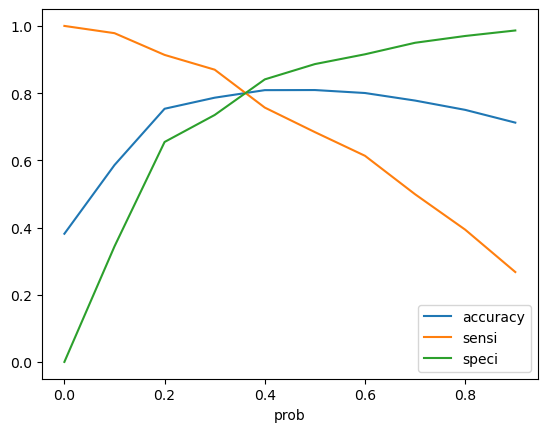

In [120]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- From the curve above, 0.37 is the optimum point to take it as a cutoff probability.

In [121]:
#Lets do mapping again with optimal cutoff point

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.101349         5493          0    1    1    0    0    0   
1          0        0.100987         8064          0    1    1    0    0    0   
2          0        0.146669         4716          0    1    1    0    0    0   
3          0        0.331964         9117          0    1    1    1    1    0   
4          1        0.458673         2402          0    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                0  
1    0    0    0    0    0                0  
2    0    0    0    0    0                0  
3    0    0    0    0    0                0  
4    0    0    0    0    0                1

In [122]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8045886075949367

In [123]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3207,  702],
       [ 533, 1878]], dtype=int64)

In [124]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [125]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7789299046038988

In [126]:
# Let us calculate specificity
TN / float(TN+FP)

0.8204144282425173

In [127]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.17958557175748274


In [128]:
# Positive predictive value 
print (TP / float(TP+FP))

0.727906976744186


In [129]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8574866310160428


- Confusion Matrixarray
    [[3207,  702],
    [ 533, 1878]]
- Accuracy - 80.45%
- Sensitivity- 77.8%
- Specificity- 82.04%
- False postive rate - 18%
- Positive predictive value - 73%
- Negative predictive value - 86%


### Precision and Recall

In [130]:
##Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3465,  444],
       [ 762, 1649]], dtype=int64)

##### Precision
TP / TP + FP

In [131]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.78786430960344

##### Recall
TP / TP + FN

In [132]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.683948569058482

In [133]:
#Using sklearn utilities for the same

In [134]:
from sklearn.metrics import precision_score, recall_score

In [135]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.78786430960344

In [136]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.683948569058482

### Precision and recall tradeoff

In [137]:
from sklearn.metrics import precision_recall_curve

In [138]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6315    0
 6316    1
 6317    1
 6318    1
 6319    0
 Name: Converted, Length: 6320, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6315    0
 6316    1
 6317    1
 6318    1
 6319    0
 Name: Predicted, Length: 6320, dtype: int64)

In [139]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

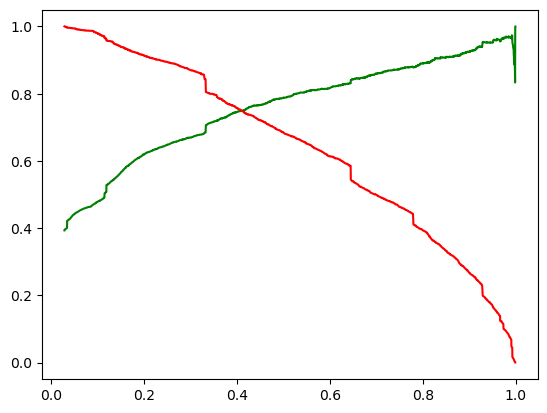

In [140]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

- Here the threshold is 0.41 from the above curve

In [141]:
# Copy the train model evaluation results to precision_recall_final
y_train_precision_recall_final = y_train_pred_final.copy()

In [142]:
y_train_precision_recall_final['precision_recall_predicted'] = y_train_precision_recall_final.Converted_Prob.map( lambda x: 1 if x > 0.41 else 0)

y_train_precision_recall_final.head()

Converted  Converted_Prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.101349         5493          0    1    1    0    0    0   
1          0        0.100987         8064          0    1    1    0    0    0   
2          0        0.146669         4716          0    1    1    0    0    0   
3          0        0.331964         9117          0    1    1    1    1    0   
4          1        0.458673         2402          0    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_predicted  precision_recall_predicted  
0    0    0    0    0    0                0                           0  
1    0    0    0    0    0                0                           0  
2    0    0    0    0    0                0                           0  
3    0    0    0    0    0                0                           0  
4    0    0    0    0    0                1                           1

In [143]:
confusion2 = metrics.confusion_matrix(y_train_precision_recall_final.Converted, y_train_precision_recall_final.precision_recall_predicted )
confusion2

array([[3307,  602],
       [ 607, 1804]], dtype=int64)

##### Precision
TP / TP + FP

In [144]:
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.7497921862011637

In [145]:
precision_score(y_train_precision_recall_final.Converted, y_train_precision_recall_final.precision_recall_predicted)

0.7497921862011637

##### Recall
TP / TP + FN

In [146]:
recall_score(y_train_precision_recall_final.Converted,y_train_precision_recall_final.precision_recall_predicted)

0.7482372459560348

- Confusion Matrix
    [3307,  602],
       [ 607, 1804]
- precision_score- 75%
- recall_score - 75%


####  we will go with sensitivity-specificity view for our Optimal cut-off for final predictions as this has better results

### Adding  Lead Score  feature for training data set

In [147]:
# Adding  Lead Score  feature for training data set

y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.101349         5493          0    1    1    0    0    0   
1          0        0.100987         8064          0    1    1    0    0    0   
2          0        0.146669         4716          0    1    1    0    0    0   
3          0        0.331964         9117          0    1    1    1    1    0   
4          1        0.458673         2402          0    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_predicted  Lead_Score  
0    0    0    0    0    0                0          10  
1    0    0    0    0    0                0          10  
2    0    0    0    0    0                0          15  
3    0    0    0    0    0                0          33  
4    0    0    0    0    0                1          46

- A higher lead score means the lead is hot and it is most likey to be converted

### Step 8: Making predictions on the test set

In [148]:
X_test.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
4664             0          0.0                            0   
5394             0          4.0                          164   
1595             0          4.0                         1171   
2111             0          7.0                          522   
9182             0          0.0                            0   

      Page Views Per Visit  A free copy of Mastering The Interview  \
4664                  0.00                                       0   
5394                  1.33                                       0   
1595                  4.00                                       0   
2111                  7.00                                       1   
9182                  0.00                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Quick Add Form  \
4664                                    0                           0   
5394                                    0                           0   
1595                                    1                           0   
2111                                    1                           0   
9182                                    0                           0   

      Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
4664                           0                     0                   0   
5394                           0                     0                   0   
1595                           0                     0                   0   
2111                           1                     0                   0   
9182                           0                     0                   0   

      Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
4664                      0                   0                       1   
5394                      0                   0                       1   
1595                      0                   0                       0   
2111                      0                   0                       0   
9182                      0                   0                       1   

      Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
4664                           0                              0   
5394                           0                              0   
1595                           1                              0   
2111                           0                              0   
9182                           0                              0   

      Lead Source_Press_Release  Lead Source_Reference  \
4664                          0                      0   
5394                          0                      0   
1595                          0                      0   
2111                          0                      0   
9182                          0                      0   

      Lead Source_Referral Sites  Lead Source_Social Media  \
4664                           0                         0   
5394                           0                         0   
1595                           0                         0   
2111                           0                         0   
9182                           0                         0   

      Lead Source_WeLearn  Lead Source_Welingak Website  Lead Source_bing  \
4664                    0                             0                 0   
5394                    0                             0                 0   
1595                    0                             0                 0   
2111                    0                             0                 0   
9182                    0                             0                 0   

      Lead Source_blog  Lead Source_testone  Lead Source_welearnblog_Home  \
4664                 0                    0                             0   
5394                 0                    0                             0   
1595                 0

In [149]:
# Scaling Test 
# Fetching all the numeric columns of type int64 and float64 from dataframe for scaling
num_cols=X_test.select_dtypes(include=['int64','float64']).columns
num_cols

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview'],
      dtype='object')

In [150]:
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [151]:
X_test = X_test[col]
X_test.head()

Total Time Spent on Website  Lead Source_Direct Traffic  \
4664                    -0.884316                           0   
5394                    -0.583371                           0   
1595                     1.264507                           0   
2111                     0.073571                           1   
9182                    -0.884316                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Organic Search  \
4664                     0                   0                           0   
5394                     0                   0                           0   
1595                     0                   0                           1   
2111                     0                   0                           0   
9182                     0                   0                           0   

      Lead Source_Reference  Lead Source_Referral Sites  \
4664                      0                           0   
5394                      0                           0   
1595                      0                           0   
2111                      0                           0   
9182                      0                           0   

      Lead Source_Welingak Website  Last Activity_Email Bounced  \
4664                             0                            0   
5394                             0                            0   
1595                             0                            0   
2111                             0                            0   
9182                             0                            0   

      Last Activity_Had a Phone Conversation  \
4664                                       0   
5394                                       0   
1595                                       0   
2111                                       0   
9182                                       0   

      Last Activity_Olark Chat Conversation  Last Activity_SMS Sent  \
4664                                      0                       0   
5394                                      0                       0   
1595                                      0                       0   
2111                                      0                       0   
9182                                      0                       1   

      What is your current occupation_Unknown  \
4664                                        0   
5394                                        1   
1595                                        0   
2111                                        1   
9182                                        0   

      What is your current occupation_Working Professional  
4664                                                  0     
5394                                                  0     
1595                                                  1     
2111                                                  0     
9182                                                  0

In [152]:
# Adding constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2709, 15)

#### Making predictions on the test set

In [153]:
y_test_pred = res.predict(X_test_sm)

In [154]:
y_test_pred[:10]

4664    0.331964
5394    0.156648
1595    0.922463
2111    0.066258
9182    0.644457
1055    0.840382
541     0.082120
446     0.992560
3728    0.031471
4249    0.041040
dtype: float64

In [155]:
# Converting y_pred to a dataframe which is an array
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred

0
4664  0.331964
5394  0.156648
1595  0.922463
2111  0.066258
9182  0.644457
...        ...
7438  0.832220
4944  0.794618
7563  0.455854
5398  0.059030
4823  0.106721

[2709 rows x 1 columns]

In [156]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [157]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [158]:
# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [159]:
# Appending y_test_df and y_test_pred_
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)

In [160]:
y_pred_final.head()

Converted  Prospect ID         0
0          0         4664  0.331964
1          0         5394  0.156648
2          1         1595  0.922463
3          0         2111  0.066258
4          0         9182  0.644457

In [161]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [162]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)
y_pred_final.head()

Prospect ID  Converted  Converted_Prob
0         4664          0        0.331964
1         5394          0        0.156648
2         1595          1        0.922463
3         2111          0        0.066258
4         9182          0        0.644457

In [163]:
# Taking sensitivity-Specificity method cut-off on the test data as well
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted
0         4664          0        0.331964                0
1         5394          0        0.156648                0
2         1595          1        0.922463                1
3         2111          0        0.066258                0
4         9182          0        0.644457                1

In [164]:
# Drawing ROD curve on test set
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Converted_Prob, drop_intermediate = False )

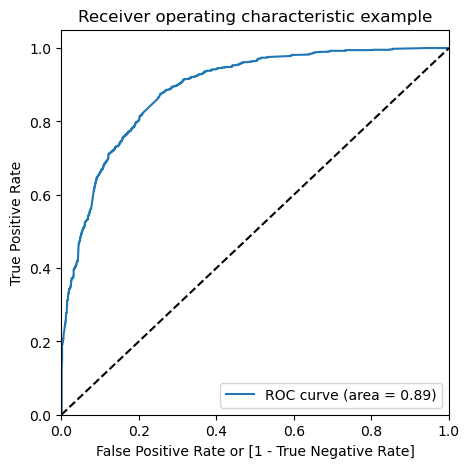

In [165]:
draw_roc(y_pred_final.Converted, y_pred_final.Converted_Prob)

- Area under ROC curve is 0.89 which indicates good predictive model

### Test Dataset Model Evaluation

In [166]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8039867109634552

In [167]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1329,  314],
       [ 217,  849]], dtype=int64)

In [168]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [169]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7964352720450282

In [170]:
# Let us calculate specificity
TN / float(TN+FP)

0.8088861838101035

- Accuracy- 80.39 %
- Sensitivity- 79.6 %
- Specificity- 80.88 %



- So This model is performing well on both Training set and test set

In [171]:
# Getting the features and their coefficient from final model
parameters= res.params.sort_values(ascending=False)
parameters

Lead Source_Welingak Website                            4.058151
What is your current occupation_Working Professional    2.340993
Lead Source_Reference                                   1.957659
Last Activity_Had a Phone Conversation                  1.596854
Last Activity_SMS Sent                                  1.294075
Total Time Spent on Website                             1.083158
const                                                   0.258539
Lead Source_Google                                     -1.187657
What is your current occupation_Unknown                -1.310041
Last Activity_Olark Chat Conversation                  -1.351337
Lead Source_Facebook                                   -1.376687
Lead Source_Organic Search                             -1.492901
Lead Source_Referral Sites                             -1.525395
Last Activity_Email Bounced                            -1.542686
Lead Source_Direct Traffic                             -1.673825
dtype: float64

- A high coefficient indicates that a variable has a stronger influence on predicting the probability of elads convertion.

##### Adding lead Score feature for the Test data set

In [172]:
# Adding  Lead Score  feature for training data set

y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted  Lead_Score
0         4664          0        0.331964                0          33
1         5394          0        0.156648                0          16
2         1595          1        0.922463                1          92
3         2111          0        0.066258                0           7
4         9182          0        0.644457                1          64

- A higher lead score means the lead is hot and it is most likey to be converted

## Conclusions:

Train set:
- Accuracy - 80.45%
- Sensitivity- 77.8%
- Specificity- 82.04%

Test set:
- Accuracy- 80.39 %
- Sensitivity- 79.6 %
- Specificity- 80.88 %
    
##### Model is performing well on both Training and Test set

The model has achieved an accuracy of 80% which is in line with the objective of the X education CEO

##### Three top features contributing to predicting the hot leads are:

- Lead Source_Welingak Website                            
- What is your current occupation_Working Professional    
- Lead Source_Reference 


### Recommendations:

- Focus more on the below features :
    - Lead Source_Welingak Website                            
    - What is your current occupation_Working Professional  
    - Lead Source_Reference                                   
    - Last Activity_Had a Phone Conversation                  
    - Last Activity_SMS Sent                                  
    - Total Time Spent on Website                                                                             
- Welingak Website has very high lead conversion rate. So, more budget can be spent on Welingak Website like spending more budget in terms of advertising etc  
- Working Professionals can be targeted more as they have very high conversion rate
- The leads who have sent SMS or who had a Phone conversation are more likely to convert. So, sales team should prioritize contacting them .
- More focus should be on the customers who have come through Reference as it has high probability of lead conversion. To   encourage more references, company can think of providing referral bonus or some discounts to the existing customersif their references gets converted
- Targeting customers who are spending more time on the website
